# Estudo para a prova:
## Sumario:
### Pipeline ML
#### 1- Definir o problema
##### - Qual é a tarefa que queremos ensinar um computador a fazer?
#### 2- Coletar os dados
##### - Escolher uma base de dados do gagle basica para testes
##### - Dividir os dados de teste em 3 grupos: Treino, Validação e Teste
#### 3- Extração de Características (features)
##### - Avaliar as caracteriticas importantes da base estudada
##### - Não é uma tarefa fácil.
#### 4- Treinamento do modelo
##### - Usar o conjunto de testes para isso
#### 5- Testar o desempenho do modelo treinado
##### - Usar o conjunto de testes para isso
##### - medir a sua capacidade de generalização ao classificar outras imagens de cães e gatos não apresentados na etapa de treinamento

In [5]:
#!pip install torch



### 3. Preparação dos dados
### - Uma regra comum é que 80% do projeto é a preparação de dados
#### ❑ Selecionar dados: Determine quais os conjuntos de dados serão usados e documente os motivos da inclusão/exclusão
#### ❑ Limpeza de dados
##### ❑ Corrigir oou remover outiliers (opcional)
##### ❑ Preencher valores ausentes (missing values) ou eliminar suas instâncias (ou colunas)
#### ❑ Seleção de características (opcional): eliminar (“dropa”) os atributos que não fornecem informações úteis para a tarefa
#### ❑ Engenharia de Atributos ou de características (Feature Engineering): reformatar os dados conforme necessário. Por exemplo, discretizar características contínuas, realizar transformações (ex.: log(x), sqrt(x), etc.), compor novas características a partir das existentes, padronizar ou normalizar as características, etc
### - Boas práticas:
#### • Trabalhe com as cópias dos dados
#### • Escreva funções para todas as transformação de dados que for aplicar. Motivos
#### • Preparar facilmente os dados da próxima vez que obtiver um novo conjunto de dados
#### • Aplicar essas transformações em projetos futuros para: Limpar e preparar o conjunto de teste, limpar e preparar novas instâncias de dados quando a solução estiver em produção
#### • Facilitar as escolhas como hiperparâmetros

### 4. Modelagem
#### 1. Treine muitos modelos rápidos e simples de diferentes categorias (ex.: linear, Naive Bayes, SVM, random florest, rede neural, etc) usando parâmetros-padrão
#### 2. Medir e comparar o desempenho (ex: média e desvio-padrão do erro). Para cada modelo é interessante usar a validação cruzada k-fold
#### 3. Analise as variáveis mais significativas para cada algoritmo
#### 4. Analise os erros que os modelos cometem
#### 5. Execute uma rodada rápida de seleção de características e feature engineering
#### 6. Rode mais uma ou duas iterações rápidas das 5 etapas anteriores
#### 7. Faça uma pré-seleção de 3 à 5 modelos com melhor desempenho

### 5. Avaliação
#### ❑ Avalie os resultados: Os modelos atendem aos critérios de sucesso do negócio? Qual(is) devemos aprovar para o negócio?
#### ❑ Processo de revisão: Revise o trabalho realizado. Alguma coisa foi esquecida? Todas as etapas foram executadas corretamente? Resuma as descobertas e corrija qualquer coisa, se necessário
#### ❑ Apresente sua solução. Documentar o que foi feito, explicar porque sua solução alcança o objetivo do negócio, etc
#### ❑ Determine as próximas etapas: Com base nas três tarefas anteriores, determine se deve continuar com a implantação, iterar mais ou iniciar novos projetos Importante: não ajuste seu modelo depois de medir o erro de generalização: você simplesmente começaria a ajustar o conjunto de teste

### 6. Implantação
#### ❑ Planejar a implantação: Desenvolva e documente um plano para implantar o modelo.
#### ❑ Plano de monitoramento e manutenção: Desenvolva um plano completo de monitoramento e manutenção para evitar problemas durante a fase operacional (ou fase pós-projeto) de um modelo.
#### ❑ Produzir relatório final: A equipe do projeto documenta um resumo do projeto que pode incluir uma apresentação final dos resultados da mineração de dados.
#### ❑ Revisão do projeto: Conduza uma retrospectiva do projeto sobre o que deu certo, o que poderia ter sido melhor e como melhorar no futuro

# Aplicando Imports

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 Entendimento do negocio

## Defina o objetivo em termos de negócios
- Ao buscar na internet soluções em graficos é necessario que haja uma forma automatizada de encontrar graficos e defini-los
- Há também a possibilidade de gerar uma metrica de quantidade de graficos e suas relações, e por fim aplicar um verificador de graficos.

## Como a solução será usada?
- Como ferramenta de busca de graficos em determinado escopo ou como ferramenta de enssino.

## Quais as soluções/alternativas atuais (caso existam)?
- atualmente algumas ferramentas de busca já realizam a comparação entre imagens e muitas até usam isso, mas a proposta é apresentar uma ferramenta apropriada para esse tipo de reconhecimento: Definir o tipo de grafico.

## Como você deve abordar este problema (supervisionado/não supervisionado, etc)?
- Aprendizado supervisionado: busco encontrar predições a partir de imagens.
- Usarei tecnicas de deepLearning.

## Como o desempenho deve ser medido?
- Matrizes de confusão e metricas como percentual de acerto, etc.

## A medida de desempenho está alinhada com o objetivo do negócio?
- Sim, o algoritmo precisa de acurácia 

## Qual seria o desempenho mínimo para alcançar o objetivo
- acima de 90% de acerto seria um resultado.
- porém, busca-se valores acima de 95% 

## Tem especialista humano disponível?
- Eu mesmo posso definir e diferenciar determinados graficos.

## É possível reutilizar experiências ou ferramentas de outros contextos?
- o Google é uma caixa-preta, não posso usar o algoritmos deles aqui, porem já existem trabalhos neste sentido, mas ainda não consegui usá-los.

## Como você resolveria o problema manualmente
- Manualmente seria uma tarefa muito simples, ao visualizar um grafico eu definiria seu tipo, porem para fazer isso em muitas imagens isso poderia demanfdar muito tempo.

## Produza um plano do projeto selecionando as tecnologias e ferramentas e definindo planos detalhados para cada fase do projeto

### Planejamento
- Este projeto tem como finalidade desenvolver uma ferramenta de deeplearn capaz de diferenciar alguns tipos de graficos e propiciar uma predição apartir de dada uma imagem, ter como resposta um grafico.

#### Tecnologias
- para isso usarei algumas ferramentas:
    - Anaconda, para ser usada como ambiente de desenvoolvimento e facilitar o import de diversas libs.
    - A "IDE" Jupyter Lab / Jupyter Notebook para o sesemvolvimento estruturado e para a apresentação de resultados.
    - A linguagem de de sexemvolvimento Python 3.9
    - Dados encontrados na plataforma kaggle.
    
#### Ferramentas
- como ferrementas vou usar algumas libs:
    - TensorFlow, para aplicar o deeplearn
    - cv2, para tratamento de imagens
    - 
    
#### Detalhamento das fazes do projeto
1. encontrar imagens para serem usadas como dados da ferramenta.
2. tratar esses dados
    - possivelmente as imgens virão todas juntas em uma unica pastas, separá-las sera um pequeno desafio.
    - Definir quais imagems podem ser usadas e quais não podem.
    - Realizar um tratamento nas imagens para encontrar resultados validos.
3. Desenvolver o algoritmo para reconhecimento de imagens.
4. testar o algoritmo usando dados separados para esse fim.
5. Desenvolver uma ferramamenta mobile que realize o reconhecimento.

# 2. Compreensão dos dados
## Colete os dados de que você precisa e de quanto precisa.
- Os dados foram encontrados no seguinte endereço: [Kaggle](https://www.kaggle.com/datasets/sunedition/graphs-dataset)
- Para o meu projeto eu preferi baixar os dados.

## Verifique quanto de espaço esses dados ocuparão e obtenha autorização de uso, se necessário, assegurando que as informações confidencias sejam excluídas ou protegidas (ex. deixando-as anônimas)
- Os dados possuem o tamanho aproximado de 1.09GB, relativamente pequeno.
- não são daodos sensiveis e não necessitam de alteração.
- há apenas o pedido de citação dos dados.  [Kaggle](https://www.kaggle.com/datasets/sunedition/graphs-dataset)

## Descreva os dados: examine os dados e documente suas propriedades, como formato de dados, número de registros ou identidades de campo
- Os dados são separados em 8 classes:
    - 0 - **just image**: Apenas uma imagem sem qualquer grafico
    - 1 - **bar chart**: Grafico de barras
    - 2 - **diagram**: diagrmas
    - 3 - **flow chart**: graficos de fluxo
    - 4 - **graph**: apenas um grafico
    - 5 - **growth chart**: grafico de crescimento
    - 6 - **pie chart**: grafico de pizza
    - 7 - **table**: tabela

### Trata-se e um conjunto de imagens:
- A quantidade de imagens diversas:

In [28]:
diretorio_imagens = '/Users/User/Documents/Projetos/Imagens/graphs/'
dados = os.listdir(diretorio_imagens)


Neste projeto serão usadas 15875 imagens


##### OBS: Para facilitar o uso do data set vamos criar um dataframa usando pandas.

In [77]:

nome_classes = ["just_image", "bar_chart", "diagram", "flow_chart", "graph", "growth_chart", "pie_chart","table"]

dataset = []
for i in dados:
    for j in range(len(nome_classes)):
        if nome_classes[j]+"_" in i:
            dataset.append([nome_classes[j],i.split(".")[-1],j,i])
            break

dataset_array = np.array(dataset)

df_dataset = pd.DataFrame(data=dataset_array, columns=["classe", "tipo", "id_calsse", "nome"])

df_dataset[:5]
            
            

,classe,tipo,id_calsse,nome
0,bar_chart,jpg,1,bar_chart_0006-006-Stolbchataja-diagramma.jpg.jpg
1,bar_chart,jpg,1,bar_chart_008.jpg.jpg
2,bar_chart,jpg,1,bar_chart_013d0eca-b83e-414c-a36e-2643be4afdf5...
3,bar_chart,jpg,1,bar_chart_016f9769-c0d4-4d4a-8826-50769edf4344...
4,bar_chart,jpg,1,bar_chart_0183d9dc691b8c66d60814b4a1c88037.jpg...


In [159]:
print("Neste projeto serão usadas %d imagens" %len(dados))

Neste projeto serão usadas 15875 imagens


###### Dessa quantidade, as imagens estao divididas em: 
- Quanto a classe:

In [141]:
df_dataset_classe = df_dataset.groupby(["classe"])['classe'].count()
df_dataset_classe

classe
bar_chart       1982
diagram         2006
flow_chart      1708
graph           1913
growth_chart    1171
just_image      3174
pie_chart       1856
table           2065
Name: classe, dtype: int64

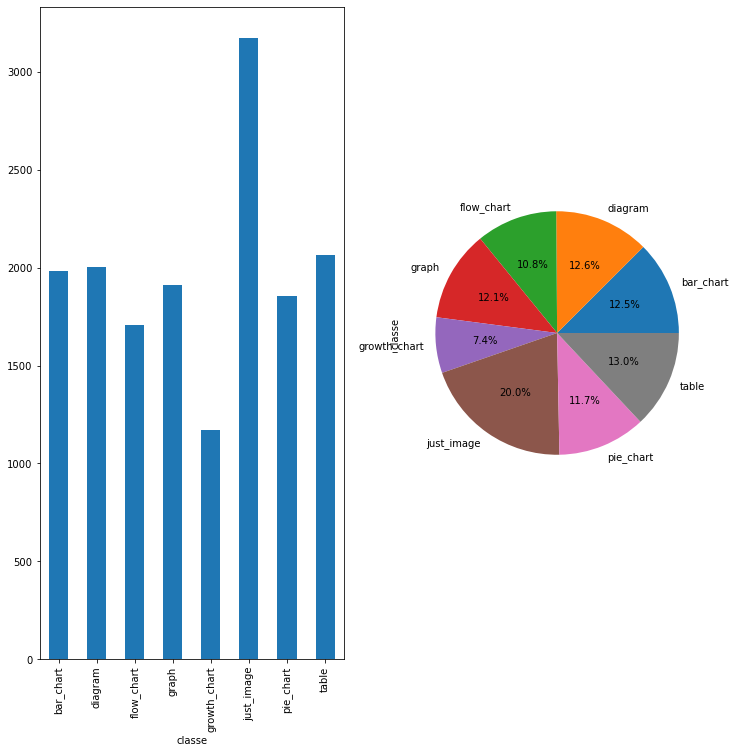

In [171]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df_dataset_classe.plot.bar(ax=axes[0], figsize=(10, 10))#, autopct='%1.1f%%')
df_dataset_classe.plot.pie(ax=axes[1], figsize=(12, 12), autopct='%1.1f%%')

plt.show()

    - mosta uma certa similaridade entre as quantidades de cada tipo de classse
    
- quanto ao formato da imagem:

In [154]:
df_dataset_tipo = df_dataset.groupby(["tipo"])['tipo']\
    .count()

df_dataset_tipo

tipo
JPG        10
gif         3
jpeg        2
jpg     15763
png        96
webp        1
Name: tipo, dtype: int64

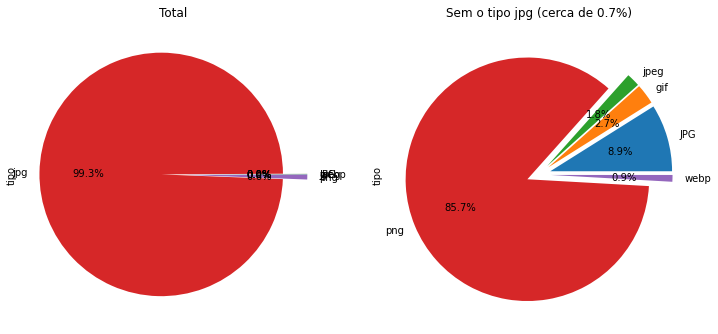

In [179]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df_dataset_tipo\
    .plot\
    .pie(
        ax = axes[0],
        figsize=(12, 12),
        autopct='%1.1f%%',
        explode=[0.1 for _ in range(len(df_dataset_tipo))]   
    )
axes[0].set_title("Total")

df_dataset_tipo\
    .drop(index='jpg')\
    .plot\
    .pie(
        ax = axes[1],
        figsize=(12, 12),
        autopct='%1.1f%%',
        explode=[0.1 for _ in range(len(df_dataset_tipo)-1)]
    )
axes[1].set_title("Sem o tipo jpg (cerca de 0.7%)")

plt.show()

###### Separar os dados entre os dados de treino: 80% e teste: 20%

In [225]:
def imagem():
    image_name = os.path.join(self.dir_path, self.file_list[idx])
        
    if image_name.split('.')[::-1][0] == "gif":
        gif = cv2.VideoCapture(image_name)
        _, image = gif.read()
    else:
        image = cv2.imread(image_name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for name, label in self.label_dict.items():
        if name in image_name.split('/')[::-1][0]:
            self.label = label
            break

    if self.transform:
        augmented = self.transform(image=image)
        image = augmented['image']

    return image, self.label

def test(a):
    print(str(a)+"coisa")
    return []#os.path.join(diretorio_imagens, a)

#df_dataset['imagem'] = df['nome'].transform(len)
df_dataset
teste = df_dataset.groupby(["tipo","nome"])["tipo","nome"].transform(test)
teste

C:\Users\User\AppData\Local\Temp\ipykernel_6408\274975766.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  teste = df_dataset.groupby(["tipo","nome"])["tipo","nome"].transform(test)


8875    JPG
Name: tipo, dtype: objectcoisa
8875    just_image_18bb9742-565f-4a51-9252-f56e3720841...
Name: nome, dtype: objectcoisa
     tipo                                               nome
8875  JPG  just_image_18bb9742-565f-4a51-9252-f56e3720841...coisa
8906    JPG
Name: tipo, dtype: objectcoisa
8906    just_image_208f1dee-2e88-45de-9edb-c8768af8235...
Name: nome, dtype: objectcoisa
8955    JPG
Name: tipo, dtype: objectcoisa
8955    just_image_3a2e1a39-a1fa-4726-9cc5-5a617983923...
Name: nome, dtype: objectcoisa
9035    JPG
Name: tipo, dtype: objectcoisa
9035    just_image_64273fcf-a58c-4809-8d36-4fa39fb8400...
Name: nome, dtype: objectcoisa
9137    JPG
Name: tipo, dtype: objectcoisa
9137    just_image_992d85d5-3933-4a7e-8d39-ed5d94b0efd...
Name: nome, dtype: objectcoisa
9199    JPG
Name: tipo, dtype: objectcoisa
9199    just_image_bb3a35e3-c628-44ca-8fd4-8ef9f4f67ac...
Name: nome, dtype: objectcoisa
9255    JPG
Name: tipo, dtype: objectcoisa
9255    just_image_c06f8807-85df-4495-

Name: tipo, dtype: objectcoisa
124    bar_chart_65a0b9e9481c73b6a9c0426e66f9534824db...
Name: nome, dtype: objectcoisa
126    jpg
Name: tipo, dtype: objectcoisa
126    bar_chart_6d56d1e5-5ffe-4dba-9ec0-5bcc0824bf1e...
Name: nome, dtype: objectcoisa
127    jpg
Name: tipo, dtype: objectcoisa
127    bar_chart_6e05daba-53eb-46cc-96ca-29b28ee49c35...
Name: nome, dtype: objectcoisa
128    jpg
Name: tipo, dtype: objectcoisa
128    bar_chart_6e565640-232a-42f3-96df-19068f836a52...
Name: nome, dtype: objectcoisa
129    jpg
Name: tipo, dtype: objectcoisa
129    bar_chart_6f1f5725-d024-405c-94e2-a84d108cb116...
Name: nome, dtype: objectcoisa
130    jpg
Name: tipo, dtype: objectcoisa
130    bar_chart_7-combined-multi-series-bar-and-line...
Name: nome, dtype: objectcoisa
131    jpg
Name: tipo, dtype: objectcoisa
131    bar_chart_700px-BarChart.png.jpg
Name: nome, dtype: objectcoisa
132    jpg
Name: tipo, dtype: objectcoisa
132    bar_chart_70e4971c-8883-4329-8cfd-a595c1e17156...
Name: nome, dtype: 

Name: tipo, dtype: objectcoisa
191    bar_chart_a280a29e-ede8-4900-8a75-45f42b68f678...
Name: nome, dtype: objectcoisa
192    jpg
Name: tipo, dtype: objectcoisa
192    bar_chart_a3cac228-e46f-48a3-9c6e-0380e519a5ee...
Name: nome, dtype: objectcoisa
193    jpg
Name: tipo, dtype: objectcoisa
193    bar_chart_a51d16f7-bb54-4822-86d2-fe1cdd4a0433...
Name: nome, dtype: objectcoisa
194    jpg
Name: tipo, dtype: objectcoisa
194    bar_chart_a54ae8ae-9b0d-4cf7-91a9-fd64f3228e5a...
Name: nome, dtype: objectcoisa
195    jpg
Name: tipo, dtype: objectcoisa
195    bar_chart_a83bf776-5a9d-4284-83ce-103f20de618d...
Name: nome, dtype: objectcoisa
196    jpg
Name: tipo, dtype: objectcoisa
196    bar_chart_a92ef994-8da0-4cb6-9e66-7d2cbfa60e02...
Name: nome, dtype: objectcoisa
197    jpg
Name: tipo, dtype: objectcoisa
197    bar_chart_a9f0ead7-d37f-409b-9676-daf497fa03bb...
Name: nome, dtype: objectcoisa
198    jpg
Name: tipo, dtype: objectcoisa
198    bar_chart_aa35d4d7-ab0c-42de-a6fa-7faaf41539db...
Na

Name: tipo, dtype: objectcoisa
406    bar_chart_image1 (2).jpeg.jpg
Name: nome, dtype: objectcoisa
407    jpg
Name: tipo, dtype: objectcoisa
407    bar_chart_image1 (2).png.jpg
Name: nome, dtype: objectcoisa
408    jpg
Name: tipo, dtype: objectcoisa
408    bar_chart_image1 (3).jpeg.jpg
Name: nome, dtype: objectcoisa
409    jpg
Name: tipo, dtype: objectcoisa
409    bar_chart_image1 (3).png.jpg
Name: nome, dtype: objectcoisa
410    jpg
Name: tipo, dtype: objectcoisa
410    bar_chart_image1.jpeg.jpg
Name: nome, dtype: objectcoisa
411    jpg
Name: tipo, dtype: objectcoisa
411    bar_chart_image1.png.jpg
Name: nome, dtype: objectcoisa
412    jpg
Name: tipo, dtype: objectcoisa
412    bar_chart_image10 (2).png.jpg
Name: nome, dtype: objectcoisa
413    jpg
Name: tipo, dtype: objectcoisa
413    bar_chart_image10 (3).png.jpg
Name: nome, dtype: objectcoisa
414    jpg
Name: tipo, dtype: objectcoisa
414    bar_chart_image10 (4).png.jpg
Name: nome, dtype: objectcoisa
415    jpg
Name: tipo, dtype: ob

Name: tipo, dtype: objectcoisa
535    bar_chart_images11 (2).jpg.jpg
Name: nome, dtype: objectcoisa
536    jpg
Name: tipo, dtype: objectcoisa
536    bar_chart_images11 (3).jpg.jpg
Name: nome, dtype: objectcoisa
537    jpg
Name: tipo, dtype: objectcoisa
537    bar_chart_images11.jpg.jpg
Name: nome, dtype: objectcoisa
538    jpg
Name: tipo, dtype: objectcoisa
538    bar_chart_images110 (3).jpg.jpg
Name: nome, dtype: objectcoisa
539    jpg
Name: tipo, dtype: objectcoisa
539    bar_chart_images110 (4).jpg.jpg
Name: nome, dtype: objectcoisa
540    jpg
Name: tipo, dtype: objectcoisa
540    bar_chart_images110.jpg.jpg
Name: nome, dtype: objectcoisa
541    jpg
Name: tipo, dtype: objectcoisa
541    bar_chart_images111 (2).jpg.jpg
Name: nome, dtype: objectcoisa
542    jpg
Name: tipo, dtype: objectcoisa
542    bar_chart_images111.jpg.jpg
Name: nome, dtype: objectcoisa
543    jpg
Name: tipo, dtype: objectcoisa
543    bar_chart_images112 (2).jpg.jpg
Name: nome, dtype: objectcoisa
544    jpg
Name: t

Name: tipo, dtype: objectcoisa
644    bar_chart_images142.jpg.jpg
Name: nome, dtype: objectcoisa
645    jpg
Name: tipo, dtype: objectcoisa
645    bar_chart_images143 (2).jpg.jpg
Name: nome, dtype: objectcoisa
646    jpg
Name: tipo, dtype: objectcoisa
646    bar_chart_images143 (3).jpg.jpg
Name: nome, dtype: objectcoisa
647    jpg
Name: tipo, dtype: objectcoisa
647    bar_chart_images143 (4).jpg.jpg
Name: nome, dtype: objectcoisa
648    jpg
Name: tipo, dtype: objectcoisa
648    bar_chart_images143.jpg.jpg
Name: nome, dtype: objectcoisa
649    jpg
Name: tipo, dtype: objectcoisa
649    bar_chart_images144 (2).jpg.jpg
Name: nome, dtype: objectcoisa
650    jpg
Name: tipo, dtype: objectcoisa
650    bar_chart_images144 (3).jpg.jpg
Name: nome, dtype: objectcoisa
651    jpg
Name: tipo, dtype: objectcoisa
651    bar_chart_images144.jpg.jpg
Name: nome, dtype: objectcoisa
652    jpg
Name: tipo, dtype: objectcoisa
652    bar_chart_images145 (2).jpg.jpg
Name: nome, dtype: objectcoisa
653    jpg
Name

Name: tipo, dtype: objectcoisa
784    bar_chart_images185.jpg.jpg
Name: nome, dtype: objectcoisa
785    jpg
Name: tipo, dtype: objectcoisa
785    bar_chart_images186 (2).jpg.jpg
Name: nome, dtype: objectcoisa
786    jpg
Name: tipo, dtype: objectcoisa
786    bar_chart_images186 (3).jpg.jpg
Name: nome, dtype: objectcoisa
787    jpg
Name: tipo, dtype: objectcoisa
787    bar_chart_images186 (4).jpg.jpg
Name: nome, dtype: objectcoisa
788    jpg
Name: tipo, dtype: objectcoisa
788    bar_chart_images186.jpg.jpg
Name: nome, dtype: objectcoisa
789    jpg
Name: tipo, dtype: objectcoisa
789    bar_chart_images187 (2).jpg.jpg
Name: nome, dtype: objectcoisa
790    jpg
Name: tipo, dtype: objectcoisa
790    bar_chart_images187 (3).jpg.jpg
Name: nome, dtype: objectcoisa
791    jpg
Name: tipo, dtype: objectcoisa
791    bar_chart_images187 (4).jpg.jpg
Name: nome, dtype: objectcoisa
792    jpg
Name: tipo, dtype: objectcoisa
792    bar_chart_images187.jpg.jpg
Name: nome, dtype: objectcoisa
793    jpg
Name

Name: tipo, dtype: objectcoisa
931    bar_chart_images228 (3).jpg.jpg
Name: nome, dtype: objectcoisa
932    jpg
Name: tipo, dtype: objectcoisa
932    bar_chart_images229 (2).jpg.jpg
Name: nome, dtype: objectcoisa
933    jpg
Name: tipo, dtype: objectcoisa
933    bar_chart_images229 (3).jpg.jpg
Name: nome, dtype: objectcoisa
934    jpg
Name: tipo, dtype: objectcoisa
934    bar_chart_images229 (4).jpg.jpg
Name: nome, dtype: objectcoisa
935    jpg
Name: tipo, dtype: objectcoisa
935    bar_chart_images23 (2).jpg.jpg
Name: nome, dtype: objectcoisa
936    jpg
Name: tipo, dtype: objectcoisa
936    bar_chart_images23 (3).jpg.jpg
Name: nome, dtype: objectcoisa
937    jpg
Name: tipo, dtype: objectcoisa
937    bar_chart_images23 (4).jpg.jpg
Name: nome, dtype: objectcoisa
938    jpg
Name: tipo, dtype: objectcoisa
938    bar_chart_images23.jpg.jpg
Name: nome, dtype: objectcoisa
939    jpg
Name: tipo, dtype: objectcoisa
939    bar_chart_images230.jpg.jpg
Name: nome, dtype: objectcoisa
940    jpg
Name

Name: tipo, dtype: objectcoisa
1076    bar_chart_images275.jpg.jpg
Name: nome, dtype: objectcoisa
1077    jpg
Name: tipo, dtype: objectcoisa
1077    bar_chart_images276 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1078    jpg
Name: tipo, dtype: objectcoisa
1078    bar_chart_images276 (3).jpg.jpg
Name: nome, dtype: objectcoisa
1079    jpg
Name: tipo, dtype: objectcoisa
1079    bar_chart_images276 (4).jpg.jpg
Name: nome, dtype: objectcoisa
1080    jpg
Name: tipo, dtype: objectcoisa
1080    bar_chart_images276.jpg.jpg
Name: nome, dtype: objectcoisa
1081    jpg
Name: tipo, dtype: objectcoisa
1081    bar_chart_images277 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1082    jpg
Name: tipo, dtype: objectcoisa
1082    bar_chart_images277 (3).jpg.jpg
Name: nome, dtype: objectcoisa
1083    jpg
Name: tipo, dtype: objectcoisa
1083    bar_chart_images277.jpg.jpg
Name: nome, dtype: objectcoisa
1084    jpg
Name: tipo, dtype: objectcoisa
1084    bar_chart_images278 (2).jpg.jpg
Name: nome, dtype: objectcois

Name: tipo, dtype: objectcoisa
1195    bar_chart_images315.jpg.jpg
Name: nome, dtype: objectcoisa
1196    jpg
Name: tipo, dtype: objectcoisa
1196    bar_chart_images316 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1197    jpg
Name: tipo, dtype: objectcoisa
1197    bar_chart_images316 (3).jpg.jpg
Name: nome, dtype: objectcoisa
1198    jpg
Name: tipo, dtype: objectcoisa
1198    bar_chart_images316.jpg.jpg
Name: nome, dtype: objectcoisa
1199    jpg
Name: tipo, dtype: objectcoisa
1199    bar_chart_images317 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1200    jpg
Name: tipo, dtype: objectcoisa
1200    bar_chart_images317.jpg.jpg
Name: nome, dtype: objectcoisa
1201    jpg
Name: tipo, dtype: objectcoisa
1201    bar_chart_images318 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1202    jpg
Name: tipo, dtype: objectcoisa
1202    bar_chart_images318 (3).jpg.jpg
Name: nome, dtype: objectcoisa
1203    jpg
Name: tipo, dtype: objectcoisa
1203    bar_chart_images318.jpg.jpg
Name: nome, dtype: objectcoisa
12

1327    jpg
Name: tipo, dtype: objectcoisa
1327    bar_chart_images371 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1328    jpg
Name: tipo, dtype: objectcoisa
1328    bar_chart_images371.jpg.jpg
Name: nome, dtype: objectcoisa
1329    jpg
Name: tipo, dtype: objectcoisa
1329    bar_chart_images372.jpg.jpg
Name: nome, dtype: objectcoisa
1330    jpg
Name: tipo, dtype: objectcoisa
1330    bar_chart_images373 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1331    jpg
Name: tipo, dtype: objectcoisa
1331    bar_chart_images373.jpg.jpg
Name: nome, dtype: objectcoisa
1332    jpg
Name: tipo, dtype: objectcoisa
1332    bar_chart_images374.jpg.jpg
Name: nome, dtype: objectcoisa
1333    jpg
Name: tipo, dtype: objectcoisa
1333    bar_chart_images375 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1334    jpg
Name: tipo, dtype: objectcoisa
1334    bar_chart_images375.jpg.jpg
Name: nome, dtype: objectcoisa
1335    jpg
Name: tipo, dtype: objectcoisa
1335    bar_chart_images376 (2).jpg.jpg
Name: nome, dtype: object

Name: tipo, dtype: objectcoisa
1468    bar_chart_images435 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1469    jpg
Name: tipo, dtype: objectcoisa
1469    bar_chart_images435 (3).jpg.jpg
Name: nome, dtype: objectcoisa
1470    jpg
Name: tipo, dtype: objectcoisa
1470    bar_chart_images435.jpg.jpg
Name: nome, dtype: objectcoisa
1471    jpg
Name: tipo, dtype: objectcoisa
1471    bar_chart_images436 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1472    jpg
Name: tipo, dtype: objectcoisa
1472    bar_chart_images436.jpg.jpg
Name: nome, dtype: objectcoisa
1473    jpg
Name: tipo, dtype: objectcoisa
1473    bar_chart_images437 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1474    jpg
Name: tipo, dtype: objectcoisa
1474    bar_chart_images437.jpg.jpg
Name: nome, dtype: objectcoisa
1475    jpg
Name: tipo, dtype: objectcoisa
1475    bar_chart_images438.jpg.jpg
Name: nome, dtype: objectcoisa
1476    jpg
Name: tipo, dtype: objectcoisa
1476    bar_chart_images439 (2).jpg.jpg
Name: nome, dtype: objectcoisa
14

Name: tipo, dtype: objectcoisa
1627    bar_chart_images5 (3).jpg.jpg
Name: nome, dtype: objectcoisa
1628    jpg
Name: tipo, dtype: objectcoisa
1628    bar_chart_images5 (4).jpg.jpg
Name: nome, dtype: objectcoisa
1629    jpg
Name: tipo, dtype: objectcoisa
1629    bar_chart_images50 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1630    jpg
Name: tipo, dtype: objectcoisa
1630    bar_chart_images50.jpg.jpg
Name: nome, dtype: objectcoisa
1631    jpg
Name: tipo, dtype: objectcoisa
1631    bar_chart_images500 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1632    jpg
Name: tipo, dtype: objectcoisa
1632    bar_chart_images500.jpg.jpg
Name: nome, dtype: objectcoisa
1633    jpg
Name: tipo, dtype: objectcoisa
1633    bar_chart_images501 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1634    jpg
Name: tipo, dtype: objectcoisa
1634    bar_chart_images501.jpg.jpg
Name: nome, dtype: objectcoisa
1635    jpg
Name: tipo, dtype: objectcoisa
1635    bar_chart_images502.jpg.jpg
Name: nome, dtype: objectcoisa
1636    

Name: tipo, dtype: objectcoisa
1777    bar_chart_images61 (3).jpg.jpg
Name: nome, dtype: objectcoisa
1778    jpg
Name: tipo, dtype: objectcoisa
1778    bar_chart_images61 (4).jpg.jpg
Name: nome, dtype: objectcoisa
1779    jpg
Name: tipo, dtype: objectcoisa
1779    bar_chart_images61.jpg.jpg
Name: nome, dtype: objectcoisa
1780    jpg
Name: tipo, dtype: objectcoisa
1780    bar_chart_images62 (3).jpg.jpg
Name: nome, dtype: objectcoisa
1781    jpg
Name: tipo, dtype: objectcoisa
1781    bar_chart_images62.jpg.jpg
Name: nome, dtype: objectcoisa
1782    jpg
Name: tipo, dtype: objectcoisa
1782    bar_chart_images63 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1783    jpg
Name: tipo, dtype: objectcoisa
1783    bar_chart_images63.jpg.jpg
Name: nome, dtype: objectcoisa
1784    jpg
Name: tipo, dtype: objectcoisa
1784    bar_chart_images64 (2).jpg.jpg
Name: nome, dtype: objectcoisa
1785    jpg
Name: tipo, dtype: objectcoisa
1785    bar_chart_images64 (3).jpg.jpg
Name: nome, dtype: objectcoisa
1786   

Name: tipo, dtype: objectcoisa
1925    bar_chart_method-of-constructing-a-histogram.p...
Name: nome, dtype: objectcoisa
1926    jpg
Name: tipo, dtype: objectcoisa
1926    bar_chart_multi-bar.png.jpg
Name: nome, dtype: objectcoisa
1927    jpg
Name: tipo, dtype: objectcoisa
1927    bar_chart_multimodal_histogram.png.jpg
Name: nome, dtype: objectcoisa
1928    jpg
Name: tipo, dtype: objectcoisa
1928    bar_chart_multiple20bars20mine.jpg.jpg
Name: nome, dtype: objectcoisa
1931    jpg
Name: tipo, dtype: objectcoisa
1931    bar_chart_nZPrM8gsFpiBeSakkoPHsQ.jpeg.jpg
Name: nome, dtype: objectcoisa
1929    jpg
Name: tipo, dtype: objectcoisa
1929    bar_chart_nature-histogram1.png.jpg
Name: nome, dtype: objectcoisa
1933    jpg
Name: tipo, dtype: objectcoisa
1933    bar_chart_p58-1.jpg.jpg
Name: nome, dtype: objectcoisa
1934    jpg
Name: tipo, dtype: objectcoisa
1934    bar_chart_page-43.jpg.jpg
Name: nome, dtype: objectcoisa
1935    jpg
Name: tipo, dtype: objectcoisa
1935    bar_chart_pict--bar-g

Name: nome, dtype: objectcoisa
2088    jpg
Name: tipo, dtype: objectcoisa
2088    diagram_43f1d781-b759-453d-bdb2-b5123cb21cfa.jpg
Name: nome, dtype: objectcoisa
2089    jpg
Name: tipo, dtype: objectcoisa
2089    diagram_44.png.jpg
Name: nome, dtype: objectcoisa
2090    jpg
Name: tipo, dtype: objectcoisa
2090    diagram_443f11d9-5869-4a15-be47-f35b38af5847.jpg
Name: nome, dtype: objectcoisa
2091    jpg
Name: tipo, dtype: objectcoisa
2091    diagram_44d0c830-533d-4e88-95fb-22f7023e3354.jpg
Name: nome, dtype: objectcoisa
2093    jpg
Name: tipo, dtype: objectcoisa
2093    diagram_46fd2f79-bc42-4d07-8a1e-b6fc86d1e2d7.jpg
Name: nome, dtype: objectcoisa
2094    jpg
Name: tipo, dtype: objectcoisa
2094    diagram_47a0774e-82e0-4027-816c-1dfec9e913c1.jpg
Name: nome, dtype: objectcoisa
2095    jpg
Name: tipo, dtype: objectcoisa
2095    diagram_48.png.jpg
Name: nome, dtype: objectcoisa
2096    jpg
Name: tipo, dtype: objectcoisa
2096    diagram_486bb929-03aa-4a6f-8cd3-a8e67780da7e.jpg
Name: nome, 

Name: tipo, dtype: objectcoisa
3971    diagram_SPIDER-chart-Google-Sheets.jpg.jpg
Name: nome, dtype: objectcoisa
3950    jpg
Name: tipo, dtype: objectcoisa
3950    diagram_Sample-Radar-Chart.png.jpg
Name: nome, dtype: objectcoisa
3951    jpg
Name: tipo, dtype: objectcoisa
3951    diagram_Screen-Shot-2019-04-09-at-12.37.43-AM....
Name: nome, dtype: objectcoisa
3952    jpg
Name: tipo, dtype: objectcoisa
3952    diagram_Screen-Shot-2019-06-21-at-10.13.39.png...
Name: nome, dtype: objectcoisa
3954    jpg
Name: tipo, dtype: objectcoisa
3954    diagram_Screenshot-286.png.jpg
Name: nome, dtype: objectcoisa
3957    jpg
Name: tipo, dtype: objectcoisa
3957    diagram_Simple_radar.png.jpg
Name: nome, dtype: objectcoisa
3975    jpg
Name: tipo, dtype: objectcoisa
3975    diagram_Stratechi-Radar-Chart.jpg.jpg
Name: nome, dtype: objectcoisa
3977    jpg
Name: tipo, dtype: objectcoisa
3977    diagram_Tqnv5Bq.png.jpg
Name: nome, dtype: objectcoisa
3981    jpg
Name: tipo, dtype: objectcoisa
3981    diagr

Name: tipo, dtype: objectcoisa
2343    diagram_image0.jpeg.jpg
Name: nome, dtype: objectcoisa
2344    jpg
Name: tipo, dtype: objectcoisa
2344    diagram_image0.png.jpg
Name: nome, dtype: objectcoisa
2345    jpg
Name: tipo, dtype: objectcoisa
2345    diagram_image013.png.jpg
Name: nome, dtype: objectcoisa
2346    jpg
Name: tipo, dtype: objectcoisa
2346    diagram_image013_16.jpg.jpg
Name: nome, dtype: objectcoisa
2347    jpg
Name: tipo, dtype: objectcoisa
2347    diagram_image1 (2).jpeg.jpg
Name: nome, dtype: objectcoisa
2348    jpg
Name: tipo, dtype: objectcoisa
2348    diagram_image1 (2).png.jpg
Name: nome, dtype: objectcoisa
2349    jpg
Name: tipo, dtype: objectcoisa
2349    diagram_image1 (3).jpeg.jpg
Name: nome, dtype: objectcoisa
2350    jpg
Name: tipo, dtype: objectcoisa
2350    diagram_image1 (3).png.jpg
Name: nome, dtype: objectcoisa
2351    jpg
Name: tipo, dtype: objectcoisa
2351    diagram_image1 (4).jpeg.jpg
Name: nome, dtype: objectcoisa
2352    jpg
Name: tipo, dtype: objec

Name: tipo, dtype: objectcoisa
2486    diagram_images11(1).jpg.jpg
Name: nome, dtype: objectcoisa
2487    jpg
Name: tipo, dtype: objectcoisa
2487    diagram_images11.jpg.jpg
Name: nome, dtype: objectcoisa
2488    jpg
Name: tipo, dtype: objectcoisa
2488    diagram_images110 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2489    jpg
Name: tipo, dtype: objectcoisa
2489    diagram_images110 (3).jpg.jpg
Name: nome, dtype: objectcoisa
2490    jpg
Name: tipo, dtype: objectcoisa
2490    diagram_images110.jpg.jpg
Name: nome, dtype: objectcoisa
2491    jpg
Name: tipo, dtype: objectcoisa
2491    diagram_images111 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2492    jpg
Name: tipo, dtype: objectcoisa
2492    diagram_images111.jpg.jpg
Name: nome, dtype: objectcoisa
2493    jpg
Name: tipo, dtype: objectcoisa
2493    diagram_images112 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2494    jpg
Name: tipo, dtype: objectcoisa
2494    diagram_images112 (3).jpg.jpg
Name: nome, dtype: objectcoisa
2495    jpg
Name: t

Name: tipo, dtype: objectcoisa
2629    diagram_images155.jpg.jpg
Name: nome, dtype: objectcoisa
2630    jpg
Name: tipo, dtype: objectcoisa
2630    diagram_images156 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2631    jpg
Name: tipo, dtype: objectcoisa
2631    diagram_images156(1).jpg.jpg
Name: nome, dtype: objectcoisa
2632    jpg
Name: tipo, dtype: objectcoisa
2632    diagram_images156.jpg.jpg
Name: nome, dtype: objectcoisa
2633    jpg
Name: tipo, dtype: objectcoisa
2633    diagram_images157 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2634    jpg
Name: tipo, dtype: objectcoisa
2634    diagram_images157 (3).jpg.jpg
Name: nome, dtype: objectcoisa
2635    jpg
Name: tipo, dtype: objectcoisa
2635    diagram_images157 (4).jpg.jpg
Name: nome, dtype: objectcoisa
2636    jpg
Name: tipo, dtype: objectcoisa
2636    diagram_images157.jpg.jpg
Name: nome, dtype: objectcoisa
2637    jpg
Name: tipo, dtype: objectcoisa
2637    diagram_images158 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2638    jpg
Name:

Name: nome, dtype: objectcoisa
2773    jpg
Name: tipo, dtype: objectcoisa
2773    diagram_images199.jpg.jpg
Name: nome, dtype: objectcoisa
2774    jpg
Name: tipo, dtype: objectcoisa
2774    diagram_images2 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2775    jpg
Name: tipo, dtype: objectcoisa
2775    diagram_images2 (3).jpg.jpg
Name: nome, dtype: objectcoisa
2776    jpg
Name: tipo, dtype: objectcoisa
2776    diagram_images2(1).jpg.jpg
Name: nome, dtype: objectcoisa
2777    jpg
Name: tipo, dtype: objectcoisa
2777    diagram_images2.jpg.jpg
Name: nome, dtype: objectcoisa
2778    jpg
Name: tipo, dtype: objectcoisa
2778    diagram_images20 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2779    jpg
Name: tipo, dtype: objectcoisa
2779    diagram_images20 (3).jpg.jpg
Name: nome, dtype: objectcoisa
2780    jpg
Name: tipo, dtype: objectcoisa
2780    diagram_images20.jpg.jpg
Name: nome, dtype: objectcoisa
2781    jpg
Name: tipo, dtype: objectcoisa
2781    diagram_images200 (2).jpg.jpg
Name: nome, dtyp

Name: tipo, dtype: objectcoisa
2916    diagram_images248.jpg.jpg
Name: nome, dtype: objectcoisa
2917    jpg
Name: tipo, dtype: objectcoisa
2917    diagram_images249 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2918    jpg
Name: tipo, dtype: objectcoisa
2918    diagram_images249.jpg.jpg
Name: nome, dtype: objectcoisa
2919    jpg
Name: tipo, dtype: objectcoisa
2919    diagram_images25 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2920    jpg
Name: tipo, dtype: objectcoisa
2920    diagram_images25 (3).jpg.jpg
Name: nome, dtype: objectcoisa
2921    jpg
Name: tipo, dtype: objectcoisa
2921    diagram_images25.jpg.jpg
Name: nome, dtype: objectcoisa
2922    jpg
Name: tipo, dtype: objectcoisa
2922    diagram_images250 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2923    jpg
Name: tipo, dtype: objectcoisa
2923    diagram_images250.jpg.jpg
Name: nome, dtype: objectcoisa
2924    jpg
Name: tipo, dtype: objectcoisa
2924    diagram_images251 (2).jpg.jpg
Name: nome, dtype: objectcoisa
2925    jpg
Name: tipo,

Name: tipo, dtype: objectcoisa
3061    diagram_images304 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3062    jpg
Name: tipo, dtype: objectcoisa
3062    diagram_images304.jpg.jpg
Name: nome, dtype: objectcoisa
3063    jpg
Name: tipo, dtype: objectcoisa
3063    diagram_images305 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3064    jpg
Name: tipo, dtype: objectcoisa
3064    diagram_images306 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3065    jpg
Name: tipo, dtype: objectcoisa
3065    diagram_images306 (3).jpg.jpg
Name: nome, dtype: objectcoisa
3066    jpg
Name: tipo, dtype: objectcoisa
3066    diagram_images306.jpg.jpg
Name: nome, dtype: objectcoisa
3067    jpg
Name: tipo, dtype: objectcoisa
3067    diagram_images307 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3068    jpg
Name: tipo, dtype: objectcoisa
3068    diagram_images307.jpg.jpg
Name: nome, dtype: objectcoisa
3069    jpg
Name: tipo, dtype: objectcoisa
3069    diagram_images308 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3070    jpg
Name

Name: tipo, dtype: objectcoisa
3209    diagram_images366 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3210    jpg
Name: tipo, dtype: objectcoisa
3210    diagram_images366 (3).jpg.jpg
Name: nome, dtype: objectcoisa
3211    jpg
Name: tipo, dtype: objectcoisa
3211    diagram_images366.jpg.jpg
Name: nome, dtype: objectcoisa
3212    jpg
Name: tipo, dtype: objectcoisa
3212    diagram_images367 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3213    jpg
Name: tipo, dtype: objectcoisa
3213    diagram_images367.jpg.jpg
Name: nome, dtype: objectcoisa
3214    jpg
Name: tipo, dtype: objectcoisa
3214    diagram_images368 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3215    jpg
Name: tipo, dtype: objectcoisa
3215    diagram_images368 (3).jpg.jpg
Name: nome, dtype: objectcoisa
3216    jpg
Name: tipo, dtype: objectcoisa
3216    diagram_images368.jpg.jpg
Name: nome, dtype: objectcoisa
3217    jpg
Name: tipo, dtype: objectcoisa
3217    diagram_images369 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3218    jpg
Name

Name: nome, dtype: objectcoisa
3353    jpg
Name: tipo, dtype: objectcoisa
3353    diagram_images42 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3354    jpg
Name: tipo, dtype: objectcoisa
3354    diagram_images42 (3).jpg.jpg
Name: nome, dtype: objectcoisa
3355    jpg
Name: tipo, dtype: objectcoisa
3355    diagram_images42(1).jpg.jpg
Name: nome, dtype: objectcoisa
3356    jpg
Name: tipo, dtype: objectcoisa
3356    diagram_images42.jpg.jpg
Name: nome, dtype: objectcoisa
3357    jpg
Name: tipo, dtype: objectcoisa
3357    diagram_images420 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3358    jpg
Name: tipo, dtype: objectcoisa
3358    diagram_images421 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3359    jpg
Name: tipo, dtype: objectcoisa
3359    diagram_images421.jpg.jpg
Name: nome, dtype: objectcoisa
3360    jpg
Name: tipo, dtype: objectcoisa
3360    diagram_images422 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3361    jpg
Name: tipo, dtype: objectcoisa
3361    diagram_images422 (3).jpg.jpg
Name:

Name: tipo, dtype: objectcoisa
3499    diagram_images480 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3500    jpg
Name: tipo, dtype: objectcoisa
3500    diagram_images480.jpg.jpg
Name: nome, dtype: objectcoisa
3501    jpg
Name: tipo, dtype: objectcoisa
3501    diagram_images481.jpg.jpg
Name: nome, dtype: objectcoisa
3502    jpg
Name: tipo, dtype: objectcoisa
3502    diagram_images482 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3503    jpg
Name: tipo, dtype: objectcoisa
3503    diagram_images482.jpg.jpg
Name: nome, dtype: objectcoisa
3504    jpg
Name: tipo, dtype: objectcoisa
3504    diagram_images483 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3505    jpg
Name: tipo, dtype: objectcoisa
3505    diagram_images483.jpg.jpg
Name: nome, dtype: objectcoisa
3506    jpg
Name: tipo, dtype: objectcoisa
3506    diagram_images484 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3507    jpg
Name: tipo, dtype: objectcoisa
3507    diagram_images485 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3508    jpg
Name: ti

Name: tipo, dtype: objectcoisa
3651    diagram_images55 (3).jpg.jpg
Name: nome, dtype: objectcoisa
3652    jpg
Name: tipo, dtype: objectcoisa
3652    diagram_images55.jpg.jpg
Name: nome, dtype: objectcoisa
3653    jpg
Name: tipo, dtype: objectcoisa
3653    diagram_images550 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3654    jpg
Name: tipo, dtype: objectcoisa
3654    diagram_images550.jpg.jpg
Name: nome, dtype: objectcoisa
3655    jpg
Name: tipo, dtype: objectcoisa
3655    diagram_images551 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3656    jpg
Name: tipo, dtype: objectcoisa
3656    diagram_images551.jpg.jpg
Name: nome, dtype: objectcoisa
3657    jpg
Name: tipo, dtype: objectcoisa
3657    diagram_images552.jpg.jpg
Name: nome, dtype: objectcoisa
3658    jpg
Name: tipo, dtype: objectcoisa
3658    diagram_images553 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3659    jpg
Name: tipo, dtype: objectcoisa
3659    diagram_images553.jpg.jpg
Name: nome, dtype: objectcoisa
3660    jpg
Name: tipo, dt

Name: tipo, dtype: objectcoisa
3807    diagram_images95.jpg.jpg
Name: nome, dtype: objectcoisa
3808    jpg
Name: tipo, dtype: objectcoisa
3808    diagram_images96 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3809    jpg
Name: tipo, dtype: objectcoisa
3809    diagram_images96 (3).jpg.jpg
Name: nome, dtype: objectcoisa
3810    jpg
Name: tipo, dtype: objectcoisa
3810    diagram_images96.jpg.jpg
Name: nome, dtype: objectcoisa
3811    jpg
Name: tipo, dtype: objectcoisa
3811    diagram_images97 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3812    jpg
Name: tipo, dtype: objectcoisa
3812    diagram_images97 (3).jpg.jpg
Name: nome, dtype: objectcoisa
3813    jpg
Name: tipo, dtype: objectcoisa
3813    diagram_images97.jpg.jpg
Name: nome, dtype: objectcoisa
3814    jpg
Name: tipo, dtype: objectcoisa
3814    diagram_images98 (2).jpg.jpg
Name: nome, dtype: objectcoisa
3815    jpg
Name: tipo, dtype: objectcoisa
3815    diagram_images98 (3).jpg.jpg
Name: nome, dtype: objectcoisa
3816    jpg
Name: tipo, d

Name: tipo, dtype: objectcoisa
3962    diagram_slide-5.jpg.jpg
Name: nome, dtype: objectcoisa
3963    jpg
Name: tipo, dtype: objectcoisa
3963    diagram_slide_12.jpg.jpg
Name: nome, dtype: objectcoisa
3964    jpg
Name: tipo, dtype: objectcoisa
3964    diagram_slide_2.jpg.jpg
Name: nome, dtype: objectcoisa
3965    jpg
Name: tipo, dtype: objectcoisa
3965    diagram_slide_64.jpg.jpg
Name: nome, dtype: objectcoisa
3966    jpg
Name: tipo, dtype: objectcoisa
3966    diagram_speed.jpg.jpg
Name: nome, dtype: objectcoisa
3967    jpg
Name: tipo, dtype: objectcoisa
3967    diagram_sphx_glr_radar_chart_001.png.jpg
Name: nome, dtype: objectcoisa
3968    jpg
Name: tipo, dtype: objectcoisa
3968    diagram_spider-chart-basic-example.png.jpg
Name: nome, dtype: objectcoisa
3969    jpg
Name: tipo, dtype: objectcoisa
3969    diagram_spider-chart-example-2-af58980330feb69...
Name: nome, dtype: objectcoisa
3970    jpg
Name: tipo, dtype: objectcoisa
3970    diagram_spider-chart-example-class.png.jpg
Name: no

Name: tipo, dtype: objectcoisa
4135    flow_chart_620.png.jpg
Name: nome, dtype: objectcoisa
4136    jpg
Name: tipo, dtype: objectcoisa
4136    flow_chart_625px-D0ADD0BBD0B5D0BCD0B5D0BDD182D...
Name: nome, dtype: objectcoisa
4137    jpg
Name: tipo, dtype: objectcoisa
4137    flow_chart_6261c21b-8adb-4dd9-8f6b-e5960ae16c2...
Name: nome, dtype: objectcoisa
4138    jpg
Name: tipo, dtype: objectcoisa
4138    flow_chart_62b398c4-3af2-467f-b1a8-f4e3fd8626d...
Name: nome, dtype: objectcoisa
4139    jpg
Name: tipo, dtype: objectcoisa
4139    flow_chart_62bbc49f-6c62-42da-97d8-fc2d81b4b0d...
Name: nome, dtype: objectcoisa
4140    jpg
Name: tipo, dtype: objectcoisa
4140    flow_chart_6464d151-d369-40af-b74f-580caba9395...
Name: nome, dtype: objectcoisa
4141    jpg
Name: tipo, dtype: objectcoisa
4141    flow_chart_681ef5b2-2f9f-48ff-a96a-1ae87711891...
Name: nome, dtype: objectcoisa
4142    jpg
Name: tipo, dtype: objectcoisa
4142    flow_chart_6938a003-57fa-4743-be8a-4b0ee631409...
Name: nome, dt

Name: tipo, dtype: objectcoisa
4254    flow_chart_complex-flowchart-algorithm-slide-t...
Name: nome, dtype: objectcoisa
4256    jpg
Name: tipo, dtype: objectcoisa
4256    flow_chart_compoundcomposer_4.jpg.jpg
Name: nome, dtype: objectcoisa
4262    jpg
Name: tipo, dtype: objectcoisa
4262    flow_chart_d2557898-e342-4521-9f88-32f434ad3c7...
Name: nome, dtype: objectcoisa
4264    jpg
Name: tipo, dtype: objectcoisa
4264    flow_chart_d55b2a3a-296e-4ce8-81e4-2b3c27e8bc4...
Name: nome, dtype: objectcoisa
4265    jpg
Name: tipo, dtype: objectcoisa
4265    flow_chart_d5f63f96-4073-4b53-a166-8cf0de86752...
Name: nome, dtype: objectcoisa
4266    jpg
Name: tipo, dtype: objectcoisa
4266    flow_chart_d6b3072d-c7de-4c8f-9945-d18ffaf72a0...
Name: nome, dtype: objectcoisa
4267    jpg
Name: tipo, dtype: objectcoisa
4267    flow_chart_d821dc23-72d5-42fa-a105-afd4ce57a50...
Name: nome, dtype: objectcoisa
4268    jpg
Name: tipo, dtype: objectcoisa
4268    flow_chart_d9b26ee1-fe9e-43d7-9f57-ae5f2e6eca5...

Name: tipo, dtype: objectcoisa
4423    flow_chart_images10 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4424    jpg
Name: tipo, dtype: objectcoisa
4424    flow_chart_images10.jpg.jpg
Name: nome, dtype: objectcoisa
4425    jpg
Name: tipo, dtype: objectcoisa
4425    flow_chart_images100 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4426    jpg
Name: tipo, dtype: objectcoisa
4426    flow_chart_images100.jpg.jpg
Name: nome, dtype: objectcoisa
4427    jpg
Name: tipo, dtype: objectcoisa
4427    flow_chart_images101 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4428    jpg
Name: tipo, dtype: objectcoisa
4428    flow_chart_images101 (3).jpg.jpg
Name: nome, dtype: objectcoisa
4429    jpg
Name: tipo, dtype: objectcoisa
4429    flow_chart_images101.jpg.jpg
Name: nome, dtype: objectcoisa
4430    jpg
Name: tipo, dtype: objectcoisa
4430    flow_chart_images102 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4431    jpg
Name: tipo, dtype: objectcoisa
4431    flow_chart_images102 (3).jpg.jpg
Name: nome, dtype: obj

Name: nome, dtype: objectcoisa
4576    jpg
Name: tipo, dtype: objectcoisa
4576    flow_chart_images171 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4577    jpg
Name: tipo, dtype: objectcoisa
4577    flow_chart_images171 (3).jpg.jpg
Name: nome, dtype: objectcoisa
4578    jpg
Name: tipo, dtype: objectcoisa
4578    flow_chart_images171.jpg.jpg
Name: nome, dtype: objectcoisa
4579    jpg
Name: tipo, dtype: objectcoisa
4579    flow_chart_images172 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4580    jpg
Name: tipo, dtype: objectcoisa
4580    flow_chart_images172.jpg.jpg
Name: nome, dtype: objectcoisa
4581    jpg
Name: tipo, dtype: objectcoisa
4581    flow_chart_images173 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4582    jpg
Name: tipo, dtype: objectcoisa
4582    flow_chart_images173.jpg.jpg
Name: nome, dtype: objectcoisa
4583    jpg
Name: tipo, dtype: objectcoisa
4583    flow_chart_images174 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4584    jpg
Name: tipo, dtype: objectcoisa
4584    flow_chart

Name: tipo, dtype: objectcoisa
4720    flow_chart_images235 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4721    jpg
Name: tipo, dtype: objectcoisa
4721    flow_chart_images235 (3).jpg.jpg
Name: nome, dtype: objectcoisa
4722    jpg
Name: tipo, dtype: objectcoisa
4722    flow_chart_images235.jpg.jpg
Name: nome, dtype: objectcoisa
4723    jpg
Name: tipo, dtype: objectcoisa
4723    flow_chart_images236.jpg.jpg
Name: nome, dtype: objectcoisa
4724    jpg
Name: tipo, dtype: objectcoisa
4724    flow_chart_images237 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4725    jpg
Name: tipo, dtype: objectcoisa
4725    flow_chart_images237.jpg.jpg
Name: nome, dtype: objectcoisa
4726    jpg
Name: tipo, dtype: objectcoisa
4726    flow_chart_images239 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4727    jpg
Name: tipo, dtype: objectcoisa
4727    flow_chart_images239.jpg.jpg
Name: nome, dtype: objectcoisa
4728    jpg
Name: tipo, dtype: objectcoisa
4728    flow_chart_images24 (2).jpg.jpg
Name: nome, dtype: object

Name: tipo, dtype: objectcoisa
4867    flow_chart_images302 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4868    jpg
Name: tipo, dtype: objectcoisa
4868    flow_chart_images302 (3).jpg.jpg
Name: nome, dtype: objectcoisa
4869    jpg
Name: tipo, dtype: objectcoisa
4869    flow_chart_images302.jpg.jpg
Name: nome, dtype: objectcoisa
4870    jpg
Name: tipo, dtype: objectcoisa
4870    flow_chart_images303 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4871    jpg
Name: tipo, dtype: objectcoisa
4871    flow_chart_images303.jpg.jpg
Name: nome, dtype: objectcoisa
4872    jpg
Name: tipo, dtype: objectcoisa
4872    flow_chart_images304 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4873    jpg
Name: tipo, dtype: objectcoisa
4873    flow_chart_images304.jpg.jpg
Name: nome, dtype: objectcoisa
4874    jpg
Name: tipo, dtype: objectcoisa
4874    flow_chart_images305 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4875    jpg
Name: tipo, dtype: objectcoisa
4875    flow_chart_images305.jpg.jpg
Name: nome, dtype: objec

Name: tipo, dtype: objectcoisa
4977    flow_chart_images356.jpg.jpg
Name: nome, dtype: objectcoisa
4978    jpg
Name: tipo, dtype: objectcoisa
4978    flow_chart_images357 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4979    jpg
Name: tipo, dtype: objectcoisa
4979    flow_chart_images357.jpg.jpg
Name: nome, dtype: objectcoisa
4980    jpg
Name: tipo, dtype: objectcoisa
4980    flow_chart_images358.jpg.jpg
Name: nome, dtype: objectcoisa
4981    jpg
Name: tipo, dtype: objectcoisa
4981    flow_chart_images359 (2).jpg.jpg
Name: nome, dtype: objectcoisa
4982    jpg
Name: tipo, dtype: objectcoisa
4982    flow_chart_images359.jpg.jpg
Name: nome, dtype: objectcoisa
4983    jpg
Name: tipo, dtype: objectcoisa
4983    flow_chart_images36.jpg.jpg
Name: nome, dtype: objectcoisa
4984    jpg
Name: tipo, dtype: objectcoisa
4984    flow_chart_images360.jpg.jpg
Name: nome, dtype: objectcoisa
4985    jpg
Name: tipo, dtype: objectcoisa
4985    flow_chart_images361 (2).jpg.jpg
Name: nome, dtype: objectcoisa
49

Name: tipo, dtype: objectcoisa
5108    flow_chart_images415.jpg.jpg
Name: nome, dtype: objectcoisa
5109    jpg
Name: tipo, dtype: objectcoisa
5109    flow_chart_images416 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5110    jpg
Name: tipo, dtype: objectcoisa
5110    flow_chart_images417.jpg.jpg
Name: nome, dtype: objectcoisa
5111    jpg
Name: tipo, dtype: objectcoisa
5111    flow_chart_images418 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5112    jpg
Name: tipo, dtype: objectcoisa
5112    flow_chart_images418.jpg.jpg
Name: nome, dtype: objectcoisa
5113    jpg
Name: tipo, dtype: objectcoisa
5113    flow_chart_images419 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5114    jpg
Name: tipo, dtype: objectcoisa
5114    flow_chart_images419.jpg.jpg
Name: nome, dtype: objectcoisa
5115    jpg
Name: tipo, dtype: objectcoisa
5115    flow_chart_images42 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5116    jpg
Name: tipo, dtype: objectcoisa
5116    flow_chart_images42.jpg.jpg
Name: nome, dtype: objectcoisa

Name: tipo, dtype: objectcoisa
5250    flow_chart_images483.jpg.jpg
Name: nome, dtype: objectcoisa
5251    jpg
Name: tipo, dtype: objectcoisa
5251    flow_chart_images484 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5252    jpg
Name: tipo, dtype: objectcoisa
5252    flow_chart_images484.jpg.jpg
Name: nome, dtype: objectcoisa
5253    jpg
Name: tipo, dtype: objectcoisa
5253    flow_chart_images485 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5254    jpg
Name: tipo, dtype: objectcoisa
5254    flow_chart_images485.jpg.jpg
Name: nome, dtype: objectcoisa
5255    jpg
Name: tipo, dtype: objectcoisa
5255    flow_chart_images487 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5256    jpg
Name: tipo, dtype: objectcoisa
5256    flow_chart_images487.jpg.jpg
Name: nome, dtype: objectcoisa
5257    jpg
Name: tipo, dtype: objectcoisa
5257    flow_chart_images489 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5258    jpg
Name: tipo, dtype: objectcoisa
5258    flow_chart_images489 (3).jpg.jpg
Name: nome, dtype: objec

Name: tipo, dtype: objectcoisa
5388    flow_chart_images546.jpg.jpg
Name: nome, dtype: objectcoisa
5389    jpg
Name: tipo, dtype: objectcoisa
5389    flow_chart_images547 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5390    jpg
Name: tipo, dtype: objectcoisa
5390    flow_chart_images547.jpg.jpg
Name: nome, dtype: objectcoisa
5391    jpg
Name: tipo, dtype: objectcoisa
5391    flow_chart_images548 (3).jpg.jpg
Name: nome, dtype: objectcoisa
5392    jpg
Name: tipo, dtype: objectcoisa
5392    flow_chart_images549 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5393    jpg
Name: tipo, dtype: objectcoisa
5393    flow_chart_images549 (3).jpg.jpg
Name: nome, dtype: objectcoisa
5394    jpg
Name: tipo, dtype: objectcoisa
5394    flow_chart_images549.jpg.jpg
Name: nome, dtype: objectcoisa
5395    jpg
Name: tipo, dtype: objectcoisa
5395    flow_chart_images55 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5396    jpg
Name: tipo, dtype: objectcoisa
5396    flow_chart_images55 (3).jpg.jpg
Name: nome, dtype: obj

Name: tipo, dtype: objectcoisa
5519    flow_chart_images608.jpg.jpg
Name: nome, dtype: objectcoisa
5520    jpg
Name: tipo, dtype: objectcoisa
5520    flow_chart_images609.jpg.jpg
Name: nome, dtype: objectcoisa
5521    jpg
Name: tipo, dtype: objectcoisa
5521    flow_chart_images61 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5522    jpg
Name: tipo, dtype: objectcoisa
5522    flow_chart_images61.jpg.jpg
Name: nome, dtype: objectcoisa
5523    jpg
Name: tipo, dtype: objectcoisa
5523    flow_chart_images610 (2).jpg.jpg
Name: nome, dtype: objectcoisa
5524    jpg
Name: tipo, dtype: objectcoisa
5524    flow_chart_images613.jpg.jpg
Name: nome, dtype: objectcoisa
5525    jpg
Name: tipo, dtype: objectcoisa
5525    flow_chart_images615.jpg.jpg
Name: nome, dtype: objectcoisa
5526    jpg
Name: tipo, dtype: objectcoisa
5526    flow_chart_images616.jpg.jpg
Name: nome, dtype: objectcoisa
5527    jpg
Name: tipo, dtype: objectcoisa
5527    flow_chart_images617 (2).jpg.jpg
Name: nome, dtype: objectcoisa
552

Name: tipo, dtype: objectcoisa
5669    flow_chart_selection-process-6019.png.jpg
Name: nome, dtype: objectcoisa
5670    jpg
Name: tipo, dtype: objectcoisa
5670    flow_chart_selectsort_flowchart.jpg.jpg
Name: nome, dtype: objectcoisa
5671    jpg
Name: tipo, dtype: objectcoisa
5671    flow_chart_simple-flow-chart-example.png.jpg
Name: nome, dtype: objectcoisa
5674    jpg
Name: tipo, dtype: objectcoisa
5674    flow_chart_slide-0.jpg.jpg
Name: nome, dtype: objectcoisa
5675    jpg
Name: tipo, dtype: objectcoisa
5675    flow_chart_slide-1.jpg.jpg
Name: nome, dtype: objectcoisa
5676    jpg
Name: tipo, dtype: objectcoisa
5676    flow_chart_slide-18.jpg.jpg
Name: nome, dtype: objectcoisa
5677    jpg
Name: tipo, dtype: objectcoisa
5677    flow_chart_slide-2.jpg.jpg
Name: nome, dtype: objectcoisa
5680    jpg
Name: tipo, dtype: objectcoisa
5680    flow_chart_slide_3.jpg.jpg
Name: nome, dtype: objectcoisa
5681    jpg
Name: tipo, dtype: objectcoisa
5681    flow_chart_smartart-powerpoint-7.jpg.jpg
N

Name: tipo, dtype: objectcoisa
5813    graph_554ca1f2-f2b1-42af-ad14-150191487ae9.jpg
Name: nome, dtype: objectcoisa
5814    jpg
Name: tipo, dtype: objectcoisa
5814    graph_56362856-4f41-42ad-a447-c88b095146b6.jpg
Name: nome, dtype: objectcoisa
5815    jpg
Name: tipo, dtype: objectcoisa
5815    graph_56d3734a-1335-40e2-be85-ee6e74be6eaa.jpg
Name: nome, dtype: objectcoisa
5816    jpg
Name: tipo, dtype: objectcoisa
5816    graph_5a9ba82c11315920922107.jpeg.jpg
Name: nome, dtype: objectcoisa
5817    jpg
Name: tipo, dtype: objectcoisa
5817    graph_5b0d52fc-1dc8-4057-904b-c9de57377c6c.jpg
Name: nome, dtype: objectcoisa
5818    jpg
Name: tipo, dtype: objectcoisa
5818    graph_5c188c5a-ac24-4e06-8f0e-f39f755d176a.jpg
Name: nome, dtype: objectcoisa
5819    jpg
Name: tipo, dtype: objectcoisa
5819    graph_5e350839-0b6c-4816-980b-ff883f074cbc.jpg
Name: nome, dtype: objectcoisa
5820    jpg
Name: tipo, dtype: objectcoisa
5820    graph_5eada352fb56c6fd0a15a738e86a31bdb31e4832...
Name: nome, dtype

Name: nome, dtype: objectcoisa
7589    jpg
Name: tipo, dtype: objectcoisa
7589    graph_TradingView-stock-chart.png.jpg
Name: nome, dtype: objectcoisa
7592    jpg
Name: tipo, dtype: objectcoisa
7592    graph_Vbpeu.png.jpg
Name: nome, dtype: objectcoisa
7601    jpg
Name: tipo, dtype: objectcoisa
7601    graph_Zeta_function_graph.png.jpg
Name: nome, dtype: objectcoisa
7603    jpg
Name: tipo, dtype: objectcoisa
7603    graph__111163117_uk10yr_yeild_06032020_dp-nc.p...
Name: nome, dtype: objectcoisa
5875    jpg
Name: tipo, dtype: objectcoisa
5875    graph_a04fcbd2-439e-4416-b43c-7ca5f3bb35b0.jpg
Name: nome, dtype: objectcoisa
5876    jpg
Name: tipo, dtype: objectcoisa
5876    graph_a2f2c7ac-5fda-4482-a32d-f1fb66bef7a5.jpg
Name: nome, dtype: objectcoisa
5877    jpg
Name: tipo, dtype: objectcoisa
5877    graph_a39d390b-4d06-490f-8985-e44296688b73.jpg
Name: nome, dtype: objectcoisa
5878    jpg
Name: tipo, dtype: objectcoisa
5878    graph_a7238f98-0c5f-473f-96f9-6ce59dec3389.jpg
Name: nome, dt

Name: tipo, dtype: objectcoisa
5974    graph_grafik-funkcii-excel_2_1.png.jpg
Name: nome, dtype: objectcoisa
5975    jpg
Name: tipo, dtype: objectcoisa
5975    graph_grafiki25-2.png.jpg
Name: nome, dtype: objectcoisa
5976    jpg
Name: tipo, dtype: objectcoisa
5976    graph_grafy10c.png.jpg
Name: nome, dtype: objectcoisa
5978    jpg
Name: tipo, dtype: objectcoisa
5978    graph_graph-cryptocurrency-market-finance-busi...
Name: nome, dtype: objectcoisa
5979    jpg
Name: tipo, dtype: objectcoisa
5979    graph_graph-curve-calculus-help-steps-x-shape....
Name: nome, dtype: objectcoisa
5980    jpg
Name: tipo, dtype: objectcoisa
5980    graph_graph-of-constant-function-above-xaxisPN...
Name: nome, dtype: objectcoisa
5982    jpg
Name: tipo, dtype: objectcoisa
5982    graph_graph01_499x390.jpg.jpg
Name: nome, dtype: objectcoisa
5983    jpg
Name: tipo, dtype: objectcoisa
5983    graph_graph1.png.jpg
Name: nome, dtype: objectcoisa
5984    jpg
Name: tipo, dtype: objectcoisa
5984    graph_graph10.jp

Name: tipo, dtype: objectcoisa
6080    graph_image9.jpeg.jpg
Name: nome, dtype: objectcoisa
6081    jpg
Name: tipo, dtype: objectcoisa
6081    graph_image9.png.jpg
Name: nome, dtype: objectcoisa
6082    jpg
Name: tipo, dtype: objectcoisa
6082    graph_images (2).jpg.jpg
Name: nome, dtype: objectcoisa
6083    jpg
Name: tipo, dtype: objectcoisa
6083    graph_images.jpg.jpg
Name: nome, dtype: objectcoisa
6084    jpg
Name: tipo, dtype: objectcoisa
6084    graph_images0.jpg.jpg
Name: nome, dtype: objectcoisa
6085    jpg
Name: tipo, dtype: objectcoisa
6085    graph_images1 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6086    jpg
Name: tipo, dtype: objectcoisa
6086    graph_images1.jpg.jpg
Name: nome, dtype: objectcoisa
6087    jpg
Name: tipo, dtype: objectcoisa
6087    graph_images10 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6088    jpg
Name: tipo, dtype: objectcoisa
6088    graph_images10.jpg.jpg
Name: nome, dtype: objectcoisa
6089    jpg
Name: tipo, dtype: objectcoisa
6089    graph_images10

Name: tipo, dtype: objectcoisa
6181    graph_images133.jpg.jpg
Name: nome, dtype: objectcoisa
6182    jpg
Name: tipo, dtype: objectcoisa
6182    graph_images134 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6183    jpg
Name: tipo, dtype: objectcoisa
6183    graph_images134.jpg.jpg
Name: nome, dtype: objectcoisa
6184    jpg
Name: tipo, dtype: objectcoisa
6184    graph_images135 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6185    jpg
Name: tipo, dtype: objectcoisa
6185    graph_images135.jpg.jpg
Name: nome, dtype: objectcoisa
6186    jpg
Name: tipo, dtype: objectcoisa
6186    graph_images136 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6187    jpg
Name: tipo, dtype: objectcoisa
6187    graph_images136.jpg.jpg
Name: nome, dtype: objectcoisa
6188    jpg
Name: tipo, dtype: objectcoisa
6188    graph_images137 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6189    jpg
Name: tipo, dtype: objectcoisa
6189    graph_images137 (3).jpg.jpg
Name: nome, dtype: objectcoisa
6190    jpg
Name: tipo, dtype: objectc

Name: tipo, dtype: objectcoisa
6273    graph_images17 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6274    jpg
Name: tipo, dtype: objectcoisa
6274    graph_images17 (3).jpg.jpg
Name: nome, dtype: objectcoisa
6275    jpg
Name: tipo, dtype: objectcoisa
6275    graph_images17 (4).jpg.jpg
Name: nome, dtype: objectcoisa
6276    jpg
Name: tipo, dtype: objectcoisa
6276    graph_images17(1).jpg.jpg
Name: nome, dtype: objectcoisa
6277    jpg
Name: tipo, dtype: objectcoisa
6277    graph_images17.jpg.jpg
Name: nome, dtype: objectcoisa
6278    jpg
Name: tipo, dtype: objectcoisa
6278    graph_images170 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6279    jpg
Name: tipo, dtype: objectcoisa
6279    graph_images170.jpg.jpg
Name: nome, dtype: objectcoisa
6280    jpg
Name: tipo, dtype: objectcoisa
6280    graph_images171 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6281    jpg
Name: tipo, dtype: objectcoisa
6281    graph_images171.jpg.jpg
Name: nome, dtype: objectcoisa
6282    jpg
Name: tipo, dtype: objectcoi

Name: tipo, dtype: objectcoisa
6379    graph_images212 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6380    jpg
Name: tipo, dtype: objectcoisa
6380    graph_images212 (3).jpg.jpg
Name: nome, dtype: objectcoisa
6381    jpg
Name: tipo, dtype: objectcoisa
6381    graph_images212.jpg.jpg
Name: nome, dtype: objectcoisa
6382    jpg
Name: tipo, dtype: objectcoisa
6382    graph_images213 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6383    jpg
Name: tipo, dtype: objectcoisa
6383    graph_images213 (3).jpg.jpg
Name: nome, dtype: objectcoisa
6384    jpg
Name: tipo, dtype: objectcoisa
6384    graph_images213.jpg.jpg
Name: nome, dtype: objectcoisa
6385    jpg
Name: tipo, dtype: objectcoisa
6385    graph_images214 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6386    jpg
Name: tipo, dtype: objectcoisa
6386    graph_images214 (3).jpg.jpg
Name: nome, dtype: objectcoisa
6387    jpg
Name: tipo, dtype: objectcoisa
6387    graph_images214.jpg.jpg
Name: nome, dtype: objectcoisa
6388    jpg
Name: tipo, dtype: obj

6501    jpg
Name: tipo, dtype: objectcoisa
6501    graph_images259 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6502    jpg
Name: tipo, dtype: objectcoisa
6502    graph_images259.jpg.jpg
Name: nome, dtype: objectcoisa
6503    jpg
Name: tipo, dtype: objectcoisa
6503    graph_images26 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6504    jpg
Name: tipo, dtype: objectcoisa
6504    graph_images26.jpg.jpg
Name: nome, dtype: objectcoisa
6505    jpg
Name: tipo, dtype: objectcoisa
6505    graph_images260 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6506    jpg
Name: tipo, dtype: objectcoisa
6506    graph_images260 (3).jpg.jpg
Name: nome, dtype: objectcoisa
6507    jpg
Name: tipo, dtype: objectcoisa
6507    graph_images260.jpg.jpg
Name: nome, dtype: objectcoisa
6508    jpg
Name: tipo, dtype: objectcoisa
6508    graph_images261.jpg.jpg
Name: nome, dtype: objectcoisa
6509    jpg
Name: tipo, dtype: objectcoisa
6509    graph_images262 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6510    jpg
Name: tipo, dtyp

Name: tipo, dtype: objectcoisa
6618    graph_images30 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6619    jpg
Name: tipo, dtype: objectcoisa
6619    graph_images30.jpg.jpg
Name: nome, dtype: objectcoisa
6620    jpg
Name: tipo, dtype: objectcoisa
6620    graph_images300 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6621    jpg
Name: tipo, dtype: objectcoisa
6621    graph_images300 (3).jpg.jpg
Name: nome, dtype: objectcoisa
6622    jpg
Name: tipo, dtype: objectcoisa
6622    graph_images300.jpg.jpg
Name: nome, dtype: objectcoisa
6623    jpg
Name: tipo, dtype: objectcoisa
6623    graph_images301 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6624    jpg
Name: tipo, dtype: objectcoisa
6624    graph_images301.jpg.jpg
Name: nome, dtype: objectcoisa
6625    jpg
Name: tipo, dtype: objectcoisa
6625    graph_images302 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6626    jpg
Name: tipo, dtype: objectcoisa
6626    graph_images302.jpg.jpg
Name: nome, dtype: objectcoisa
6627    jpg
Name: tipo, dtype: objectcoi

Name: tipo, dtype: objectcoisa
6728    graph_images341 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6729    jpg
Name: tipo, dtype: objectcoisa
6729    graph_images342 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6730    jpg
Name: tipo, dtype: objectcoisa
6730    graph_images343 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6731    jpg
Name: tipo, dtype: objectcoisa
6731    graph_images343 (3).jpg.jpg
Name: nome, dtype: objectcoisa
6732    jpg
Name: tipo, dtype: objectcoisa
6732    graph_images343.jpg.jpg
Name: nome, dtype: objectcoisa
6733    jpg
Name: tipo, dtype: objectcoisa
6733    graph_images344 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6734    jpg
Name: tipo, dtype: objectcoisa
6734    graph_images344.jpg.jpg
Name: nome, dtype: objectcoisa
6735    jpg
Name: tipo, dtype: objectcoisa
6735    graph_images345 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6736    jpg
Name: tipo, dtype: objectcoisa
6736    graph_images345.jpg.jpg
Name: nome, dtype: objectcoisa
6737    jpg
Name: tipo, dtype: obj

6843    graph_images387.jpg.jpg
Name: nome, dtype: objectcoisa
6844    jpg
Name: tipo, dtype: objectcoisa
6844    graph_images388 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6845    jpg
Name: tipo, dtype: objectcoisa
6845    graph_images388.jpg.jpg
Name: nome, dtype: objectcoisa
6846    jpg
Name: tipo, dtype: objectcoisa
6846    graph_images389 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6847    jpg
Name: tipo, dtype: objectcoisa
6847    graph_images389.jpg.jpg
Name: nome, dtype: objectcoisa
6848    jpg
Name: tipo, dtype: objectcoisa
6848    graph_images39 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6849    jpg
Name: tipo, dtype: objectcoisa
6849    graph_images39 (3).jpg.jpg
Name: nome, dtype: objectcoisa
6850    jpg
Name: tipo, dtype: objectcoisa
6850    graph_images39.jpg.jpg
Name: nome, dtype: objectcoisa
6851    jpg
Name: tipo, dtype: objectcoisa
6851    graph_images390 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6852    jpg
Name: tipo, dtype: objectcoisa
6852    graph_images390.jpg.j

Name: tipo, dtype: objectcoisa
6977    graph_images439 (3).jpg.jpg
Name: nome, dtype: objectcoisa
6978    jpg
Name: tipo, dtype: objectcoisa
6978    graph_images439.jpg.jpg
Name: nome, dtype: objectcoisa
6979    jpg
Name: tipo, dtype: objectcoisa
6979    graph_images44 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6980    jpg
Name: tipo, dtype: objectcoisa
6980    graph_images44.jpg.jpg
Name: nome, dtype: objectcoisa
6981    jpg
Name: tipo, dtype: objectcoisa
6981    graph_images440 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6982    jpg
Name: tipo, dtype: objectcoisa
6982    graph_images440 (3).jpg.jpg
Name: nome, dtype: objectcoisa
6983    jpg
Name: tipo, dtype: objectcoisa
6983    graph_images440.jpg.jpg
Name: nome, dtype: objectcoisa
6984    jpg
Name: tipo, dtype: objectcoisa
6984    graph_images441 (2).jpg.jpg
Name: nome, dtype: objectcoisa
6985    jpg
Name: tipo, dtype: objectcoisa
6985    graph_images441.jpg.jpg
Name: nome, dtype: objectcoisa
6986    jpg
Name: tipo, dtype: objectcoi

Name: tipo, dtype: objectcoisa
7114    graph_images491 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7115    jpg
Name: tipo, dtype: objectcoisa
7115    graph_images491.jpg.jpg
Name: nome, dtype: objectcoisa
7116    jpg
Name: tipo, dtype: objectcoisa
7116    graph_images492 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7117    jpg
Name: tipo, dtype: objectcoisa
7117    graph_images492 (3).jpg.jpg
Name: nome, dtype: objectcoisa
7118    jpg
Name: tipo, dtype: objectcoisa
7118    graph_images492.jpg.jpg
Name: nome, dtype: objectcoisa
7119    jpg
Name: tipo, dtype: objectcoisa
7119    graph_images493.jpg.jpg
Name: nome, dtype: objectcoisa
7120    jpg
Name: tipo, dtype: objectcoisa
7120    graph_images494 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7121    jpg
Name: tipo, dtype: objectcoisa
7121    graph_images494.jpg.jpg
Name: nome, dtype: objectcoisa
7122    jpg
Name: tipo, dtype: objectcoisa
7122    graph_images495 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7123    jpg
Name: tipo, dtype: objectc

Name: tipo, dtype: objectcoisa
7228    graph_images54.jpg.jpg
Name: nome, dtype: objectcoisa
7229    jpg
Name: tipo, dtype: objectcoisa
7229    graph_images540 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7230    jpg
Name: tipo, dtype: objectcoisa
7230    graph_images540.jpg.jpg
Name: nome, dtype: objectcoisa
7231    jpg
Name: tipo, dtype: objectcoisa
7231    graph_images541 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7232    jpg
Name: tipo, dtype: objectcoisa
7232    graph_images541.jpg.jpg
Name: nome, dtype: objectcoisa
7233    jpg
Name: tipo, dtype: objectcoisa
7233    graph_images542.jpg.jpg
Name: nome, dtype: objectcoisa
7234    jpg
Name: tipo, dtype: objectcoisa
7234    graph_images543 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7235    jpg
Name: tipo, dtype: objectcoisa
7235    graph_images543.jpg.jpg
Name: nome, dtype: objectcoisa
7236    jpg
Name: tipo, dtype: objectcoisa
7236    graph_images544 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7237    jpg
Name: tipo, dtype: objectcoisa


Name: tipo, dtype: objectcoisa
7345    graph_images598.jpg.jpg
Name: nome, dtype: objectcoisa
7346    jpg
Name: tipo, dtype: objectcoisa
7346    graph_images599 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7347    jpg
Name: tipo, dtype: objectcoisa
7347    graph_images599.jpg.jpg
Name: nome, dtype: objectcoisa
7348    jpg
Name: tipo, dtype: objectcoisa
7348    graph_images6.jpg.jpg
Name: nome, dtype: objectcoisa
7349    jpg
Name: tipo, dtype: objectcoisa
7349    graph_images60.jpg.jpg
Name: nome, dtype: objectcoisa
7350    jpg
Name: tipo, dtype: objectcoisa
7350    graph_images600 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7351    jpg
Name: tipo, dtype: objectcoisa
7351    graph_images600.jpg.jpg
Name: nome, dtype: objectcoisa
7352    jpg
Name: tipo, dtype: objectcoisa
7352    graph_images601.jpg.jpg
Name: nome, dtype: objectcoisa
7353    jpg
Name: tipo, dtype: objectcoisa
7353    graph_images602.jpg.jpg
Name: nome, dtype: objectcoisa
7354    jpg
Name: tipo, dtype: objectcoisa
7354    gr

Name: tipo, dtype: objectcoisa
7458    graph_images71.jpg.jpg
Name: nome, dtype: objectcoisa
7459    jpg
Name: tipo, dtype: objectcoisa
7459    graph_images72 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7460    jpg
Name: tipo, dtype: objectcoisa
7460    graph_images72 (3).jpg.jpg
Name: nome, dtype: objectcoisa
7461    jpg
Name: tipo, dtype: objectcoisa
7461    graph_images72.jpg.jpg
Name: nome, dtype: objectcoisa
7462    jpg
Name: tipo, dtype: objectcoisa
7462    graph_images73 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7463    jpg
Name: tipo, dtype: objectcoisa
7463    graph_images73.jpg.jpg
Name: nome, dtype: objectcoisa
7464    jpg
Name: tipo, dtype: objectcoisa
7464    graph_images74 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7465    jpg
Name: tipo, dtype: objectcoisa
7465    graph_images74.jpg.jpg
Name: nome, dtype: objectcoisa
7466    jpg
Name: tipo, dtype: objectcoisa
7466    graph_images75 (2).jpg.jpg
Name: nome, dtype: objectcoisa
7467    jpg
Name: tipo, dtype: objectcoisa
7467

Name: tipo, dtype: objectcoisa
7575    graph_slide_15.jpg.jpg
Name: nome, dtype: objectcoisa
7576    jpg
Name: tipo, dtype: objectcoisa
7576    graph_slide_2.jpg.jpg
Name: nome, dtype: objectcoisa
7577    jpg
Name: tipo, dtype: objectcoisa
7577    graph_spxpip.1570017329114.jpeg.jpg
Name: nome, dtype: objectcoisa
7578    jpg
Name: tipo, dtype: objectcoisa
7578    graph_stock-market-board-background-price-grap...
Name: nome, dtype: objectcoisa
7579    jpg
Name: tipo, dtype: objectcoisa
7579    graph_stock-market-graph-1.png.jpg
Name: nome, dtype: objectcoisa
7580    jpg
Name: tipo, dtype: objectcoisa
7580    graph_stock-market-graph-atiketta-sangasaeng.j...
Name: nome, dtype: objectcoisa
7581    jpg
Name: tipo, dtype: objectcoisa
7581    graph_stock-market-graph-big-data-visualizatio...
Name: nome, dtype: objectcoisa
7582    jpg
Name: tipo, dtype: objectcoisa
7582    graph_stock-market-graph-forex-trading-chart-b...
Name: nome, dtype: objectcoisa
7583    jpg
Name: tipo, dtype: objectcoi

Name: tipo, dtype: objectcoisa
7694    growth_chart_40-409486_business-growth-chart-p...
Name: nome, dtype: objectcoisa
7695    jpg
Name: tipo, dtype: objectcoisa
7695    growth_chart_40130530-0a45-40e4-b9d7-2836ff5bc...
Name: nome, dtype: objectcoisa
7696    jpg
Name: tipo, dtype: objectcoisa
7696    growth_chart_40550927-f10f-4d20-85c5-2510dec53...
Name: nome, dtype: objectcoisa
7697    jpg
Name: tipo, dtype: objectcoisa
7697    growth_chart_412b6f73-76bc-450f-83a8-8d88b30f4...
Name: nome, dtype: objectcoisa
7698    jpg
Name: tipo, dtype: objectcoisa
7698    growth_chart_41f92ee2-fec0-4f55-b242-cbd467256...
Name: nome, dtype: objectcoisa
7699    jpg
Name: tipo, dtype: objectcoisa
7699    growth_chart_42560388-growth-chart-graph-flat-...
Name: nome, dtype: objectcoisa
7700    jpg
Name: tipo, dtype: objectcoisa
7700    growth_chart_42f7902c-b8f4-45ec-ae6f-74691b704...
Name: nome, dtype: objectcoisa
7701    jpg
Name: tipo, dtype: objectcoisa
7701    growth_chart_43664bde-04c1-4fcd-b7b6-

Name: tipo, dtype: objectcoisa
7804    growth_chart_bar-graph-icon-png-14.jpg.jpg
Name: nome, dtype: objectcoisa
7805    jpg
Name: tipo, dtype: objectcoisa
7805    growth_chart_bar_2d_noy_pct.png.jpg
Name: nome, dtype: objectcoisa
7806    jpg
Name: tipo, dtype: objectcoisa
7806    growth_chart_bce78be8-b371-4682-80e4-a5e32182a...
Name: nome, dtype: objectcoisa
7807    jpg
Name: tipo, dtype: objectcoisa
7807    growth_chart_be52e304-5bd4-4ccf-a085-ea6145dc2...
Name: nome, dtype: objectcoisa
7808    jpg
Name: tipo, dtype: objectcoisa
7808    growth_chart_beafb2be-50bc-4cda-b4e6-a3a9672e8...
Name: nome, dtype: objectcoisa
7809    jpg
Name: tipo, dtype: objectcoisa
7809    growth_chart_bfebfd9d-bc6b-402d-8cef-c40846b20...
Name: nome, dtype: objectcoisa
7810    jpg
Name: tipo, dtype: objectcoisa
7810    growth_chart_blue-growth-chart.jpg.jpg
Name: nome, dtype: objectcoisa
7811    jpg
Name: tipo, dtype: objectcoisa
7811    growth_chart_businenessman-with-growth-chart-f...
Name: nome, dtype: 

Name: tipo, dtype: objectcoisa
7955    growth_chart_image0.png.jpg
Name: nome, dtype: objectcoisa
7956    jpg
Name: tipo, dtype: objectcoisa
7956    growth_chart_image1 (2).jpeg.jpg
Name: nome, dtype: objectcoisa
7957    jpg
Name: tipo, dtype: objectcoisa
7957    growth_chart_image1 (3).jpeg.jpg
Name: nome, dtype: objectcoisa
7958    jpg
Name: tipo, dtype: objectcoisa
7958    growth_chart_image1(1).jpeg.jpg
Name: nome, dtype: objectcoisa
7959    jpg
Name: tipo, dtype: objectcoisa
7959    growth_chart_image1(1).png.jpg
Name: nome, dtype: objectcoisa
7960    jpg
Name: tipo, dtype: objectcoisa
7960    growth_chart_image1.jpeg.jpg
Name: nome, dtype: objectcoisa
7961    jpg
Name: tipo, dtype: objectcoisa
7961    growth_chart_image10.jpeg.jpg
Name: nome, dtype: objectcoisa
7962    jpg
Name: tipo, dtype: objectcoisa
7962    growth_chart_image11 (2).jpeg.jpg
Name: nome, dtype: objectcoisa
7963    jpg
Name: tipo, dtype: objectcoisa
7963    growth_chart_image11 (3).jpeg.jpg
Name: nome, dtype: ob

Name: nome, dtype: objectcoisa
8076    jpg
Name: tipo, dtype: objectcoisa
8076    growth_chart_images125.jpg.jpg
Name: nome, dtype: objectcoisa
8077    jpg
Name: tipo, dtype: objectcoisa
8077    growth_chart_images126.jpg.jpg
Name: nome, dtype: objectcoisa
8078    jpg
Name: tipo, dtype: objectcoisa
8078    growth_chart_images127(1).jpg.jpg
Name: nome, dtype: objectcoisa
8079    jpg
Name: tipo, dtype: objectcoisa
8079    growth_chart_images127.jpg.jpg
Name: nome, dtype: objectcoisa
8080    jpg
Name: tipo, dtype: objectcoisa
8080    growth_chart_images128 (2).jpg.jpg
Name: nome, dtype: objectcoisa
8081    jpg
Name: tipo, dtype: objectcoisa
8081    growth_chart_images128 (3).jpg.jpg
Name: nome, dtype: objectcoisa
8082    jpg
Name: tipo, dtype: objectcoisa
8082    growth_chart_images128.jpg.jpg
Name: nome, dtype: objectcoisa
8083    jpg
Name: tipo, dtype: objectcoisa
8083    growth_chart_images129.jpg.jpg
Name: nome, dtype: objectcoisa
8084    jpg
Name: tipo, dtype: objectcoisa
8084    gro

Name: tipo, dtype: objectcoisa
8187    growth_chart_images179.jpg.jpg
Name: nome, dtype: objectcoisa
8188    jpg
Name: tipo, dtype: objectcoisa
8188    growth_chart_images18 (2).jpg.jpg
Name: nome, dtype: objectcoisa
8189    jpg
Name: tipo, dtype: objectcoisa
8189    growth_chart_images18 (3).jpg.jpg
Name: nome, dtype: objectcoisa
8190    jpg
Name: tipo, dtype: objectcoisa
8190    growth_chart_images18.jpg.jpg
Name: nome, dtype: objectcoisa
8191    jpg
Name: tipo, dtype: objectcoisa
8191    growth_chart_images180(1).jpg.jpg
Name: nome, dtype: objectcoisa
8192    jpg
Name: tipo, dtype: objectcoisa
8192    growth_chart_images180.jpg.jpg
Name: nome, dtype: objectcoisa
8193    jpg
Name: tipo, dtype: objectcoisa
8193    growth_chart_images181 (2).jpg.jpg
Name: nome, dtype: objectcoisa
8194    jpg
Name: tipo, dtype: objectcoisa
8194    growth_chart_images182(1).jpg.jpg
Name: nome, dtype: objectcoisa
8195    jpg
Name: tipo, dtype: objectcoisa
8195    growth_chart_images182.jpg.jpg
Name: nome,

Name: tipo, dtype: objectcoisa
8300    growth_chart_images242.jpg.jpg
Name: nome, dtype: objectcoisa
8301    jpg
Name: tipo, dtype: objectcoisa
8301    growth_chart_images243 (2).jpg.jpg
Name: nome, dtype: objectcoisa
8302    jpg
Name: tipo, dtype: objectcoisa
8302    growth_chart_images243(1).jpg.jpg
Name: nome, dtype: objectcoisa
8303    jpg
Name: tipo, dtype: objectcoisa
8303    growth_chart_images244 (2).jpg.jpg
Name: nome, dtype: objectcoisa
8304    jpg
Name: tipo, dtype: objectcoisa
8304    growth_chart_images244 (3).jpg.jpg
Name: nome, dtype: objectcoisa
8305    jpg
Name: tipo, dtype: objectcoisa
8305    growth_chart_images244(1).jpg.jpg
Name: nome, dtype: objectcoisa
8306    jpg
Name: tipo, dtype: objectcoisa
8306    growth_chart_images244.jpg.jpg
Name: nome, dtype: objectcoisa
8307    jpg
Name: tipo, dtype: objectcoisa
8307    growth_chart_images245(1).jpg.jpg
Name: nome, dtype: objectcoisa
8308    jpg
Name: tipo, dtype: objectcoisa
8308    growth_chart_images245.jpg.jpg
Name:

Name: tipo, dtype: objectcoisa
8421    growth_chart_images300(1).jpg.jpg
Name: nome, dtype: objectcoisa
8422    jpg
Name: tipo, dtype: objectcoisa
8422    growth_chart_images300.jpg.jpg
Name: nome, dtype: objectcoisa
8423    jpg
Name: tipo, dtype: objectcoisa
8423    growth_chart_images301 (2).jpg.jpg
Name: nome, dtype: objectcoisa
8424    jpg
Name: tipo, dtype: objectcoisa
8424    growth_chart_images301(1).jpg.jpg
Name: nome, dtype: objectcoisa
8425    jpg
Name: tipo, dtype: objectcoisa
8425    growth_chart_images301.jpg.jpg
Name: nome, dtype: objectcoisa
8426    jpg
Name: tipo, dtype: objectcoisa
8426    growth_chart_images302(1).jpg.jpg
Name: nome, dtype: objectcoisa
8427    jpg
Name: tipo, dtype: objectcoisa
8427    growth_chart_images302.jpg.jpg
Name: nome, dtype: objectcoisa
8428    jpg
Name: tipo, dtype: objectcoisa
8428    growth_chart_images304 (2).jpg.jpg
Name: nome, dtype: objectcoisa
8429    jpg
Name: tipo, dtype: objectcoisa
8429    growth_chart_images304.jpg.jpg
Name: nom

Name: nome, dtype: objectcoisa
8549    jpg
Name: tipo, dtype: objectcoisa
8549    growth_chart_images425.jpg.jpg
Name: nome, dtype: objectcoisa
8550    jpg
Name: tipo, dtype: objectcoisa
8550    growth_chart_images43.jpg.jpg
Name: nome, dtype: objectcoisa
8551    jpg
Name: tipo, dtype: objectcoisa
8551    growth_chart_images430.jpg.jpg
Name: nome, dtype: objectcoisa
8552    jpg
Name: tipo, dtype: objectcoisa
8552    growth_chart_images431 (2).jpg.jpg
Name: nome, dtype: objectcoisa
8553    jpg
Name: tipo, dtype: objectcoisa
8553    growth_chart_images432.jpg.jpg
Name: nome, dtype: objectcoisa
8554    jpg
Name: tipo, dtype: objectcoisa
8554    growth_chart_images437.jpg.jpg
Name: nome, dtype: objectcoisa
8555    jpg
Name: tipo, dtype: objectcoisa
8555    growth_chart_images438 (2).jpg.jpg
Name: nome, dtype: objectcoisa
8556    jpg
Name: tipo, dtype: objectcoisa
8556    growth_chart_images44(1).jpg.jpg
Name: nome, dtype: objectcoisa
8557    jpg
Name: tipo, dtype: objectcoisa
8557    growt

Name: tipo, dtype: objectcoisa
8655    growth_chart_images64 (4).jpg.jpg
Name: nome, dtype: objectcoisa
8656    jpg
Name: tipo, dtype: objectcoisa
8656    growth_chart_images64(1).jpg.jpg
Name: nome, dtype: objectcoisa
8657    jpg
Name: tipo, dtype: objectcoisa
8657    growth_chart_images65(1).jpg.jpg
Name: nome, dtype: objectcoisa
8658    jpg
Name: tipo, dtype: objectcoisa
8658    growth_chart_images65.jpg.jpg
Name: nome, dtype: objectcoisa
8659    jpg
Name: tipo, dtype: objectcoisa
8659    growth_chart_images66 (3).jpg.jpg
Name: nome, dtype: objectcoisa
8660    jpg
Name: tipo, dtype: objectcoisa
8660    growth_chart_images66.jpg.jpg
Name: nome, dtype: objectcoisa
8661    jpg
Name: tipo, dtype: objectcoisa
8661    growth_chart_images68 (2).jpg.jpg
Name: nome, dtype: objectcoisa
8662    jpg
Name: tipo, dtype: objectcoisa
8662    growth_chart_images68.jpg.jpg
Name: nome, dtype: objectcoisa
8663    jpg
Name: tipo, dtype: objectcoisa
8663    growth_chart_images69.jpg.jpg
Name: nome, dtype

Name: nome, dtype: objectcoisa
8781    jpg
Name: tipo, dtype: objectcoisa
8781    just_image_000122_ZV_SCSW_HeroImages_1900x1024...
Name: nome, dtype: objectcoisa
8782    jpg
Name: tipo, dtype: objectcoisa
8782    just_image_00e27a6a-ad43-4fdd-bce3-5540e42dccb...
Name: nome, dtype: objectcoisa
8783    jpg
Name: tipo, dtype: objectcoisa
8783    just_image_00sl-photobackup1-superJumbo.jpg.jpg
Name: nome, dtype: objectcoisa
8784    jpg
Name: tipo, dtype: objectcoisa
8784    just_image_01-black-moon.jpg.jpg
Name: nome, dtype: objectcoisa
8785    jpg
Name: tipo, dtype: objectcoisa
8785    just_image_01-cat-names-nationalgeographic_152...
Name: nome, dtype: objectcoisa
8786    jpg
Name: tipo, dtype: objectcoisa
8786    just_image_0124aa8f-05fd-424b-b917-c2c057e09fd...
Name: nome, dtype: objectcoisa
8787    jpg
Name: tipo, dtype: objectcoisa
8787    just_image_018-5207-1581118435.jpg.jpg
Name: nome, dtype: objectcoisa
8788    jpg
Name: tipo, dtype: objectcoisa
8788    just_image_01_02_preview

Name: tipo, dtype: objectcoisa
8915    just_image_2333bb5d-14b5-4405-9720-69b8793538a...
Name: nome, dtype: objectcoisa
8916    jpg
Name: tipo, dtype: objectcoisa
8916    just_image_2380e7fc-8263-4e25-becf-7ed01ae748b...
Name: nome, dtype: objectcoisa
8917    jpg
Name: tipo, dtype: objectcoisa
8917    just_image_247d2c07-aaf6-4cb3-92ec-85abde38d7f...
Name: nome, dtype: objectcoisa
8918    jpg
Name: tipo, dtype: objectcoisa
8918    just_image_25-Hilarious-vegan-memes-that-provi...
Name: nome, dtype: objectcoisa
8919    jpg
Name: tipo, dtype: objectcoisa
8919    just_image_25.png.jpg
Name: nome, dtype: objectcoisa
8920    jpg
Name: tipo, dtype: objectcoisa
8920    just_image_26115840-instagram-food-captions-qu...
Name: nome, dtype: objectcoisa
8921    jpg
Name: tipo, dtype: objectcoisa
8921    just_image_26171394-0-image-a-49_1584634275032...
Name: nome, dtype: objectcoisa
8922    jpg
Name: tipo, dtype: objectcoisa
8922    just_image_276086abe2dce1ec322e06aa12bf5733.jp...
Name: nome, dty

Name: tipo, dtype: objectcoisa
9058    just_image_717gfIV8aRL._AC_UY395_.jpg.jpg
Name: nome, dtype: objectcoisa
9059    jpg
Name: tipo, dtype: objectcoisa
9059    just_image_71931d9d-df3e-44cb-9d6b-638e8d16ba6...
Name: nome, dtype: objectcoisa
9060    jpg
Name: tipo, dtype: objectcoisa
9060    just_image_71Rbx5KKWcL._AC_UX342_.jpg.jpg
Name: nome, dtype: objectcoisa
9061    jpg
Name: tipo, dtype: objectcoisa
9061    just_image_720d00c1-f6f1-4d2f-be27-c34f9044781...
Name: nome, dtype: objectcoisa
9062    jpg
Name: tipo, dtype: objectcoisa
9062    just_image_7263f34429e5b763e1c880eed731daf13b5...
Name: nome, dtype: objectcoisa
9063    jpg
Name: tipo, dtype: objectcoisa
9063    just_image_72de8b1b-5e1b-4e35-934a-29b40a6c9eb...
Name: nome, dtype: objectcoisa
9064    jpg
Name: tipo, dtype: objectcoisa
9064    just_image_73018069.jpg.jpg
Name: nome, dtype: objectcoisa
9065    jpg
Name: tipo, dtype: objectcoisa
9065    just_image_7320260f-f8b9-440f-b5d1-7faa2b97f3a...
Name: nome, dtype: object

Name: nome, dtype: objectcoisa
9245    jpg
Name: tipo, dtype: objectcoisa
9245    just_image_BraxFeb19.jpg.jpg
Name: nome, dtype: objectcoisa
9248    jpg
Name: tipo, dtype: objectcoisa
9248    just_image_Brody-CatsReview.jpg.jpg
Name: nome, dtype: objectcoisa
9249    jpg
Name: tipo, dtype: objectcoisa
9249    just_image_Brood-Dog-Carer.jpg.jpg
Name: nome, dtype: objectcoisa
9253    jpg
Name: tipo, dtype: objectcoisa
9253    just_image_Buying20a20cat201000x600.jpeg.jpg
Name: nome, dtype: objectcoisa
9257    jpg
Name: tipo, dtype: objectcoisa
9257    just_image_C2iYbsuZTenwLGW6pr59UG.jpg.jpg
Name: nome, dtype: objectcoisa
9312    jpg
Name: tipo, dtype: objectcoisa
9312    just_image_CUBILO-BRAND-LONG-AND-EXTRA-FINE-LE...
Name: nome, dtype: objectcoisa
9269    jpg
Name: tipo, dtype: objectcoisa
9269    just_image_Canelo_crop.jpg.jpg
Name: nome, dtype: objectcoisa
9277    jpg
Name: tipo, dtype: objectcoisa
9277    just_image_Cat-Wearing-COVID-19-Mask.jpg.jpg
Name: nome, dtype: objectcoisa


Name: tipo, dtype: objectcoisa
11873    just_image_Stocksy_comp_1597520.jpg.jpg
Name: nome, dtype: objectcoisa
11874    jpg
Name: tipo, dtype: objectcoisa
11874    just_image_Strawberry-Moon-Over-Ocean.jpg.jpg
Name: nome, dtype: objectcoisa
11879    jpg
Name: tipo, dtype: objectcoisa
11879    just_image_Swedish-Vallhund-head-portrait-outd...
Name: nome, dtype: objectcoisa
11885    jpg
Name: tipo, dtype: objectcoisa
11885    just_image_Teams-Custom-Background-Setting.jpg...
Name: nome, dtype: objectcoisa
11889    jpg
Name: tipo, dtype: objectcoisa
11889    just_image_Thinking-of-getting-a-cat.png.jpg
Name: nome, dtype: objectcoisa
11891    jpg
Name: tipo, dtype: objectcoisa
11891    just_image_Tipsy.jpg.jpg
Name: nome, dtype: objectcoisa
11893    jpg
Name: tipo, dtype: objectcoisa
11893    just_image_Top-10-photographers-for-travel-por...
Name: nome, dtype: objectcoisa
11894    jpg
Name: tipo, dtype: objectcoisa
11894    just_image_Top-15-Best-Leather-Backpacks-for-M...
Name: nome, dtyp

Name: tipo, dtype: objectcoisa
9271    just_image_carbonfibre_allfeatures_05_tiny_1.j...
Name: nome, dtype: objectcoisa
9272    jpg
Name: tipo, dtype: objectcoisa
9272    just_image_careforcatss.jpg.jpg
Name: nome, dtype: objectcoisa
9273    jpg
Name: tipo, dtype: objectcoisa
9273    just_image_cat-collars-28306_cbm9631.jpg.jpg
Name: nome, dtype: objectcoisa
9274    jpg
Name: tipo, dtype: objectcoisa
9274    just_image_cat-home-441939.jpg.jpg
Name: nome, dtype: objectcoisa
9275    jpg
Name: tipo, dtype: objectcoisa
9275    just_image_cat-in-garden.jpg.jpg
Name: nome, dtype: objectcoisa
9278    jpg
Name: tipo, dtype: objectcoisa
9278    just_image_cat.jpg.jpg
Name: nome, dtype: objectcoisa
9279    jpg
Name: tipo, dtype: objectcoisa
9279    just_image_cat0.jpg.jpg
Name: nome, dtype: objectcoisa
9284    jpg
Name: tipo, dtype: objectcoisa
9284    just_image_cat_1280p_0.jpg.jpg
Name: nome, dtype: objectcoisa
9281    jpg
Name: tipo, dtype: objectcoisa
9281    just_image_cats-2-1.jpg.jpg
Name

Name: tipo, dtype: objectcoisa
9423    just_image_f6ab8763-830a-4b40-b7d4-9f955632760...
Name: nome, dtype: objectcoisa
9424    jpg
Name: tipo, dtype: objectcoisa
9424    just_image_f7e8fd50-e6f7-4c1c-9a5e-a593bf978dc...
Name: nome, dtype: objectcoisa
9425    jpg
Name: tipo, dtype: objectcoisa
9425    just_image_f95ac016-570e-40f2-bf2a-adaba4e869f...
Name: nome, dtype: objectcoisa
9426    jpg
Name: tipo, dtype: objectcoisa
9426    just_image_f9bbf76c-731d-40cf-aa64-d8f9a62e44f...
Name: nome, dtype: objectcoisa
9427    jpg
Name: tipo, dtype: objectcoisa
9427    just_image_fa79d0fc0b06741f84a7f29490dfc4d57e-...
Name: nome, dtype: objectcoisa
9429    jpg
Name: tipo, dtype: objectcoisa
9429    just_image_fashion-accessory-designer-birkin-b...
Name: nome, dtype: objectcoisa
9430    jpg
Name: tipo, dtype: objectcoisa
9430    just_image_fb3f3f4a-7afb-4997-aa96-60400f83d64...
Name: nome, dtype: objectcoisa
9431    jpg
Name: tipo, dtype: objectcoisa
9431    just_image_fb467e26-6b48-4d30-a990-e8

Name: tipo, dtype: objectcoisa
9567    just_image_image13(6).jpeg.jpg
Name: nome, dtype: objectcoisa
9568    jpg
Name: tipo, dtype: objectcoisa
9568    just_image_image13(7).jpeg.jpg
Name: nome, dtype: objectcoisa
9569    jpg
Name: tipo, dtype: objectcoisa
9569    just_image_image13.jpeg.jpg
Name: nome, dtype: objectcoisa
9570    jpg
Name: tipo, dtype: objectcoisa
9570    just_image_image14(1).jpeg.jpg
Name: nome, dtype: objectcoisa
9571    jpg
Name: tipo, dtype: objectcoisa
9571    just_image_image14(2).jpeg.jpg
Name: nome, dtype: objectcoisa
9572    jpg
Name: tipo, dtype: objectcoisa
9572    just_image_image14(3).jpeg.jpg
Name: nome, dtype: objectcoisa
9573    jpg
Name: tipo, dtype: objectcoisa
9573    just_image_image14(4).jpeg.jpg
Name: nome, dtype: objectcoisa
9574    jpg
Name: tipo, dtype: objectcoisa
9574    just_image_image14(5).jpeg.jpg
Name: nome, dtype: objectcoisa
9575    jpg
Name: tipo, dtype: objectcoisa
9575    just_image_image14(6).jpeg.jpg
Name: nome, dtype: objectcois

Name: tipo, dtype: objectcoisa
9697    just_image_image6(4).jpeg.jpg
Name: nome, dtype: objectcoisa
9698    jpg
Name: tipo, dtype: objectcoisa
9698    just_image_image6(5).jpeg.jpg
Name: nome, dtype: objectcoisa
9699    jpg
Name: tipo, dtype: objectcoisa
9699    just_image_image6(6).jpeg.jpg
Name: nome, dtype: objectcoisa
9700    jpg
Name: tipo, dtype: objectcoisa
9700    just_image_image6(7).jpeg.jpg
Name: nome, dtype: objectcoisa
9701    jpg
Name: tipo, dtype: objectcoisa
9701    just_image_image6.jpeg.jpg
Name: nome, dtype: objectcoisa
9702    jpg
Name: tipo, dtype: objectcoisa
9702    just_image_image7(1).jpeg.jpg
Name: nome, dtype: objectcoisa
9703    jpg
Name: tipo, dtype: objectcoisa
9703    just_image_image7(2).jpeg.jpg
Name: nome, dtype: objectcoisa
9704    jpg
Name: tipo, dtype: objectcoisa
9704    just_image_image7(3).jpeg.jpg
Name: nome, dtype: objectcoisa
9705    jpg
Name: tipo, dtype: objectcoisa
9705    just_image_image7(4).jpeg.jpg
Name: nome, dtype: objectcoisa
9706   

Name: nome, dtype: objectcoisa
9820    jpg
Name: tipo, dtype: objectcoisa
9820    just_image_images109(3).jpg.jpg
Name: nome, dtype: objectcoisa
9821    jpg
Name: tipo, dtype: objectcoisa
9821    just_image_images109(4).jpg.jpg
Name: nome, dtype: objectcoisa
9822    jpg
Name: tipo, dtype: objectcoisa
9822    just_image_images109.jpg.jpg
Name: nome, dtype: objectcoisa
9823    jpg
Name: tipo, dtype: objectcoisa
9823    just_image_images11 (2).jpg.jpg
Name: nome, dtype: objectcoisa
9824    jpg
Name: tipo, dtype: objectcoisa
9824    just_image_images11(1).jpg.jpg
Name: nome, dtype: objectcoisa
9825    jpg
Name: tipo, dtype: objectcoisa
9825    just_image_images11(2).jpg.jpg
Name: nome, dtype: objectcoisa
9826    jpg
Name: tipo, dtype: objectcoisa
9826    just_image_images11(3).jpg.jpg
Name: nome, dtype: objectcoisa
9827    jpg
Name: tipo, dtype: objectcoisa
9827    just_image_images11(4).jpg.jpg
Name: nome, dtype: objectcoisa
9828    jpg
Name: tipo, dtype: objectcoisa
9828    just_image_im

9954    jpg
Name: tipo, dtype: objectcoisa
9954    just_image_images128.jpg.jpg
Name: nome, dtype: objectcoisa
9955    jpg
Name: tipo, dtype: objectcoisa
9955    just_image_images129 (2).jpg.jpg
Name: nome, dtype: objectcoisa
9956    jpg
Name: tipo, dtype: objectcoisa
9956    just_image_images129(1).jpg.jpg
Name: nome, dtype: objectcoisa
9957    jpg
Name: tipo, dtype: objectcoisa
9957    just_image_images129(2).jpg.jpg
Name: nome, dtype: objectcoisa
9958    jpg
Name: tipo, dtype: objectcoisa
9958    just_image_images129(3).jpg.jpg
Name: nome, dtype: objectcoisa
9959    jpg
Name: tipo, dtype: objectcoisa
9959    just_image_images129.jpg.jpg
Name: nome, dtype: objectcoisa
9960    jpg
Name: tipo, dtype: objectcoisa
9960    just_image_images13 (2).jpg.jpg
Name: nome, dtype: objectcoisa
9961    jpg
Name: tipo, dtype: objectcoisa
9961    just_image_images13(1).jpg.jpg
Name: nome, dtype: objectcoisa
9962    jpg
Name: tipo, dtype: objectcoisa
9962    just_image_images13(2).jpg.jpg
Name: nome, 

Name: tipo, dtype: objectcoisa
10088    just_image_images150(1).jpg.jpg
Name: nome, dtype: objectcoisa
10089    jpg
Name: tipo, dtype: objectcoisa
10089    just_image_images150(2).jpg.jpg
Name: nome, dtype: objectcoisa
10090    jpg
Name: tipo, dtype: objectcoisa
10090    just_image_images150(3).jpg.jpg
Name: nome, dtype: objectcoisa
10091    jpg
Name: tipo, dtype: objectcoisa
10091    just_image_images150.jpg.jpg
Name: nome, dtype: objectcoisa
10092    jpg
Name: tipo, dtype: objectcoisa
10092    just_image_images151 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10093    jpg
Name: tipo, dtype: objectcoisa
10093    just_image_images151(1).jpg.jpg
Name: nome, dtype: objectcoisa
10094    jpg
Name: tipo, dtype: objectcoisa
10094    just_image_images151(2).jpg.jpg
Name: nome, dtype: objectcoisa
10095    jpg
Name: tipo, dtype: objectcoisa
10095    just_image_images151(3).jpg.jpg
Name: nome, dtype: objectcoisa
10096    jpg
Name: tipo, dtype: objectcoisa
10096    just_image_images151.jpg.jpg
Name:

Name: tipo, dtype: objectcoisa
10225    just_image_images179 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10226    jpg
Name: tipo, dtype: objectcoisa
10226    just_image_images179(1).jpg.jpg
Name: nome, dtype: objectcoisa
10227    jpg
Name: tipo, dtype: objectcoisa
10227    just_image_images179(2).jpg.jpg
Name: nome, dtype: objectcoisa
10228    jpg
Name: tipo, dtype: objectcoisa
10228    just_image_images179.jpg.jpg
Name: nome, dtype: objectcoisa
10229    jpg
Name: tipo, dtype: objectcoisa
10229    just_image_images18 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10230    jpg
Name: tipo, dtype: objectcoisa
10230    just_image_images18(1).jpg.jpg
Name: nome, dtype: objectcoisa
10231    jpg
Name: tipo, dtype: objectcoisa
10231    just_image_images18(2).jpg.jpg
Name: nome, dtype: objectcoisa
10232    jpg
Name: tipo, dtype: objectcoisa
10232    just_image_images18(3).jpg.jpg
Name: nome, dtype: objectcoisa
10233    jpg
Name: tipo, dtype: objectcoisa
10233    just_image_images18(4).jpg.jpg
Name: 

Name: tipo, dtype: objectcoisa
10343    just_image_images206 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10344    jpg
Name: tipo, dtype: objectcoisa
10344    just_image_images206(1).jpg.jpg
Name: nome, dtype: objectcoisa
10345    jpg
Name: tipo, dtype: objectcoisa
10345    just_image_images206.jpg.jpg
Name: nome, dtype: objectcoisa
10346    jpg
Name: tipo, dtype: objectcoisa
10346    just_image_images207 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10347    jpg
Name: tipo, dtype: objectcoisa
10347    just_image_images207(1).jpg.jpg
Name: nome, dtype: objectcoisa
10348    jpg
Name: tipo, dtype: objectcoisa
10348    just_image_images207.jpg.jpg
Name: nome, dtype: objectcoisa
10349    jpg
Name: tipo, dtype: objectcoisa
10349    just_image_images208 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10350    jpg
Name: tipo, dtype: objectcoisa
10350    just_image_images208(1).jpg.jpg
Name: nome, dtype: objectcoisa
10351    jpg
Name: tipo, dtype: objectcoisa
10351    just_image_images208.jpg.jpg
Name: 

Name: tipo, dtype: objectcoisa
10451    just_image_images236.jpg.jpg
Name: nome, dtype: objectcoisa
10452    jpg
Name: tipo, dtype: objectcoisa
10452    just_image_images237 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10453    jpg
Name: tipo, dtype: objectcoisa
10453    just_image_images237.jpg.jpg
Name: nome, dtype: objectcoisa
10454    jpg
Name: tipo, dtype: objectcoisa
10454    just_image_images238 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10455    jpg
Name: tipo, dtype: objectcoisa
10455    just_image_images238.jpg.jpg
Name: nome, dtype: objectcoisa
10456    jpg
Name: tipo, dtype: objectcoisa
10456    just_image_images239 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10457    jpg
Name: tipo, dtype: objectcoisa
10457    just_image_images239.jpg.jpg
Name: nome, dtype: objectcoisa
10458    jpg
Name: tipo, dtype: objectcoisa
10458    just_image_images24 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10459    jpg
Name: tipo, dtype: objectcoisa
10459    just_image_images24(1).jpg.jpg
Name: nome

Name: nome, dtype: objectcoisa
10563    jpg
Name: tipo, dtype: objectcoisa
10563    just_image_images274.jpg.jpg
Name: nome, dtype: objectcoisa
10564    jpg
Name: tipo, dtype: objectcoisa
10564    just_image_images275 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10565    jpg
Name: tipo, dtype: objectcoisa
10565    just_image_images275.jpg.jpg
Name: nome, dtype: objectcoisa
10566    jpg
Name: tipo, dtype: objectcoisa
10566    just_image_images276 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10567    jpg
Name: tipo, dtype: objectcoisa
10567    just_image_images276.jpg.jpg
Name: nome, dtype: objectcoisa
10568    jpg
Name: tipo, dtype: objectcoisa
10568    just_image_images277 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10569    jpg
Name: tipo, dtype: objectcoisa
10569    just_image_images277.jpg.jpg
Name: nome, dtype: objectcoisa
10570    jpg
Name: tipo, dtype: objectcoisa
10570    just_image_images278 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10571    jpg
Name: tipo, dtype: objectcoisa
10571

Name: tipo, dtype: objectcoisa
10675    just_image_images31.jpg.jpg
Name: nome, dtype: objectcoisa
10676    jpg
Name: tipo, dtype: objectcoisa
10676    just_image_images310 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10677    jpg
Name: tipo, dtype: objectcoisa
10677    just_image_images310.jpg.jpg
Name: nome, dtype: objectcoisa
10678    jpg
Name: tipo, dtype: objectcoisa
10678    just_image_images311 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10679    jpg
Name: tipo, dtype: objectcoisa
10679    just_image_images311.jpg.jpg
Name: nome, dtype: objectcoisa
10680    jpg
Name: tipo, dtype: objectcoisa
10680    just_image_images312 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10681    jpg
Name: tipo, dtype: objectcoisa
10681    just_image_images312.jpg.jpg
Name: nome, dtype: objectcoisa
10682    jpg
Name: tipo, dtype: objectcoisa
10682    just_image_images313 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10683    jpg
Name: tipo, dtype: objectcoisa
10683    just_image_images313.jpg.jpg
Name: nome, 

Name: tipo, dtype: objectcoisa
10791    just_image_images376.jpg.jpg
Name: nome, dtype: objectcoisa
10792    jpg
Name: tipo, dtype: objectcoisa
10792    just_image_images377.jpg.jpg
Name: nome, dtype: objectcoisa
10793    jpg
Name: tipo, dtype: objectcoisa
10793    just_image_images378.jpg.jpg
Name: nome, dtype: objectcoisa
10794    jpg
Name: tipo, dtype: objectcoisa
10794    just_image_images379.jpg.jpg
Name: nome, dtype: objectcoisa
10795    jpg
Name: tipo, dtype: objectcoisa
10795    just_image_images38 (2).jpg.jpg
Name: nome, dtype: objectcoisa
10796    jpg
Name: tipo, dtype: objectcoisa
10796    just_image_images38(1).jpg.jpg
Name: nome, dtype: objectcoisa
10797    jpg
Name: tipo, dtype: objectcoisa
10797    just_image_images38(2).jpg.jpg
Name: nome, dtype: objectcoisa
10798    jpg
Name: tipo, dtype: objectcoisa
10798    just_image_images38(3).jpg.jpg
Name: nome, dtype: objectcoisa
10799    jpg
Name: tipo, dtype: objectcoisa
10799    just_image_images38(4).jpg.jpg
Name: nome, dtyp

10911    just_image_images44(5).jpg.jpg
Name: nome, dtype: objectcoisa
10912    jpg
Name: tipo, dtype: objectcoisa
10912    just_image_images44.jpg.jpg
Name: nome, dtype: objectcoisa
10913    jpg
Name: tipo, dtype: objectcoisa
10913    just_image_images440.jpg.jpg
Name: nome, dtype: objectcoisa
10914    jpg
Name: tipo, dtype: objectcoisa
10914    just_image_images441.jpg.jpg
Name: nome, dtype: objectcoisa
10915    jpg
Name: tipo, dtype: objectcoisa
10915    just_image_images442.jpg.jpg
Name: nome, dtype: objectcoisa
10916    jpg
Name: tipo, dtype: objectcoisa
10916    just_image_images443.jpg.jpg
Name: nome, dtype: objectcoisa
10917    jpg
Name: tipo, dtype: objectcoisa
10917    just_image_images444.jpg.jpg
Name: nome, dtype: objectcoisa
10918    jpg
Name: tipo, dtype: objectcoisa
10918    just_image_images445.jpg.jpg
Name: nome, dtype: objectcoisa
10919    jpg
Name: tipo, dtype: objectcoisa
10919    just_image_images446.jpg.jpg
Name: nome, dtype: objectcoisa
10920    jpg
Name: tipo, d

Name: tipo, dtype: objectcoisa
11036    just_image_images51(2).jpg.jpg
Name: nome, dtype: objectcoisa
11037    jpg
Name: tipo, dtype: objectcoisa
11037    just_image_images51(3).jpg.jpg
Name: nome, dtype: objectcoisa
11038    jpg
Name: tipo, dtype: objectcoisa
11038    just_image_images51(4).jpg.jpg
Name: nome, dtype: objectcoisa
11039    jpg
Name: tipo, dtype: objectcoisa
11039    just_image_images51(5).jpg.jpg
Name: nome, dtype: objectcoisa
11040    jpg
Name: tipo, dtype: objectcoisa
11040    just_image_images51.jpg.jpg
Name: nome, dtype: objectcoisa
11041    jpg
Name: tipo, dtype: objectcoisa
11041    just_image_images510.jpg.jpg
Name: nome, dtype: objectcoisa
11042    jpg
Name: tipo, dtype: objectcoisa
11042    just_image_images511.jpg.jpg
Name: nome, dtype: objectcoisa
11043    jpg
Name: tipo, dtype: objectcoisa
11043    just_image_images512.jpg.jpg
Name: nome, dtype: objectcoisa
11044    jpg
Name: tipo, dtype: objectcoisa
11044    just_image_images513.jpg.jpg
Name: nome, dtype: o

Name: tipo, dtype: objectcoisa
11175    just_image_images59(5).jpg.jpg
Name: nome, dtype: objectcoisa
11176    jpg
Name: tipo, dtype: objectcoisa
11176    just_image_images59.jpg.jpg
Name: nome, dtype: objectcoisa
11177    jpg
Name: tipo, dtype: objectcoisa
11177    just_image_images590.jpg.jpg
Name: nome, dtype: objectcoisa
11178    jpg
Name: tipo, dtype: objectcoisa
11178    just_image_images591.jpg.jpg
Name: nome, dtype: objectcoisa
11179    jpg
Name: tipo, dtype: objectcoisa
11179    just_image_images592.jpg.jpg
Name: nome, dtype: objectcoisa
11180    jpg
Name: tipo, dtype: objectcoisa
11180    just_image_images593.jpg.jpg
Name: nome, dtype: objectcoisa
11181    jpg
Name: tipo, dtype: objectcoisa
11181    just_image_images594.jpg.jpg
Name: nome, dtype: objectcoisa
11182    jpg
Name: tipo, dtype: objectcoisa
11182    just_image_images595.jpg.jpg
Name: nome, dtype: objectcoisa
11183    jpg
Name: tipo, dtype: objectcoisa
11183    just_image_images596.jpg.jpg
Name: nome, dtype: objectc

Name: tipo, dtype: objectcoisa
11278    just_image_images647.jpg.jpg
Name: nome, dtype: objectcoisa
11279    jpg
Name: tipo, dtype: objectcoisa
11279    just_image_images648.jpg.jpg
Name: nome, dtype: objectcoisa
11280    jpg
Name: tipo, dtype: objectcoisa
11280    just_image_images649.jpg.jpg
Name: nome, dtype: objectcoisa
11281    jpg
Name: tipo, dtype: objectcoisa
11281    just_image_images65 (2).jpg.jpg
Name: nome, dtype: objectcoisa
11282    jpg
Name: tipo, dtype: objectcoisa
11282    just_image_images65(1).jpg.jpg
Name: nome, dtype: objectcoisa
11283    jpg
Name: tipo, dtype: objectcoisa
11283    just_image_images65(2).jpg.jpg
Name: nome, dtype: objectcoisa
11284    jpg
Name: tipo, dtype: objectcoisa
11284    just_image_images65(3).jpg.jpg
Name: nome, dtype: objectcoisa
11285    jpg
Name: tipo, dtype: objectcoisa
11285    just_image_images65(4).jpg.jpg
Name: nome, dtype: objectcoisa
11286    jpg
Name: tipo, dtype: objectcoisa
11286    just_image_images65(5).jpg.jpg
Name: nome, dt

Name: tipo, dtype: objectcoisa
11398    just_image_images71.jpg.jpg
Name: nome, dtype: objectcoisa
11399    jpg
Name: tipo, dtype: objectcoisa
11399    just_image_images710.jpg.jpg
Name: nome, dtype: objectcoisa
11400    jpg
Name: tipo, dtype: objectcoisa
11400    just_image_images711.jpg.jpg
Name: nome, dtype: objectcoisa
11401    jpg
Name: tipo, dtype: objectcoisa
11401    just_image_images712.jpg.jpg
Name: nome, dtype: objectcoisa
11402    jpg
Name: tipo, dtype: objectcoisa
11402    just_image_images713.jpg.jpg
Name: nome, dtype: objectcoisa
11403    jpg
Name: tipo, dtype: objectcoisa
11403    just_image_images714.jpg.jpg
Name: nome, dtype: objectcoisa
11404    jpg
Name: tipo, dtype: objectcoisa
11404    just_image_images715.jpg.jpg
Name: nome, dtype: objectcoisa
11405    jpg
Name: tipo, dtype: objectcoisa
11405    just_image_images716.jpg.jpg
Name: nome, dtype: objectcoisa
11406    jpg
Name: tipo, dtype: objectcoisa
11406    just_image_images717.jpg.jpg
Name: nome, dtype: objectcoi

Name: nome, dtype: objectcoisa
11523    jpg
Name: tipo, dtype: objectcoisa
11523    just_image_images85(5).jpg.jpg
Name: nome, dtype: objectcoisa
11524    jpg
Name: tipo, dtype: objectcoisa
11524    just_image_images85.jpg.jpg
Name: nome, dtype: objectcoisa
11525    jpg
Name: tipo, dtype: objectcoisa
11525    just_image_images86 (2).jpg.jpg
Name: nome, dtype: objectcoisa
11526    jpg
Name: tipo, dtype: objectcoisa
11526    just_image_images86(1).jpg.jpg
Name: nome, dtype: objectcoisa
11527    jpg
Name: tipo, dtype: objectcoisa
11527    just_image_images86(2).jpg.jpg
Name: nome, dtype: objectcoisa
11528    jpg
Name: tipo, dtype: objectcoisa
11528    just_image_images86(3).jpg.jpg
Name: nome, dtype: objectcoisa
11529    jpg
Name: tipo, dtype: objectcoisa
11529    just_image_images86(4).jpg.jpg
Name: nome, dtype: objectcoisa
11530    jpg
Name: tipo, dtype: objectcoisa
11530    just_image_images86(5).jpg.jpg
Name: nome, dtype: objectcoisa
11531    jpg
Name: tipo, dtype: objectcoisa
11531  

Name: tipo, dtype: objectcoisa
11661    just_image_instagram_featured-1024x683.jpg.jpg
Name: nome, dtype: objectcoisa
11663    jpg
Name: tipo, dtype: objectcoisa
11663    just_image_invasion_1_composite-1168x657.jpg.jpg
Name: nome, dtype: objectcoisa
11664    jpg
Name: tipo, dtype: objectcoisa
11664    just_image_ios13-iphone11-pro-camera-live-phot...
Name: nome, dtype: objectcoisa
11667    jpg
Name: tipo, dtype: objectcoisa
11667    just_image_ismart-shankar_156195627930.jpg.jpg
Name: nome, dtype: objectcoisa
11668    jpg
Name: tipo, dtype: objectcoisa
11668    just_image_iss059e111615.jpg.jpg
Name: nome, dtype: objectcoisa
11669    jpg
Name: tipo, dtype: objectcoisa
11669    just_image_iss063e025120.jpg.jpg
Name: nome, dtype: objectcoisa
11671    jpg
Name: tipo, dtype: objectcoisa
11671    just_image_istock-healthy-food-instagram-e1545...
Name: nome, dtype: objectcoisa
11672    jpg
Name: tipo, dtype: objectcoisa
11672    just_image_john-tecuceanu-1557217-unsplash.jpg...
Name: nome, d

Name: tipo, dtype: objectcoisa
11870    just_image_stock-photo-142984111.jpg.jpg
Name: nome, dtype: objectcoisa
11871    jpg
Name: tipo, dtype: objectcoisa
11871    just_image_stock-photo-159533631-1500x1000.jpg...
Name: nome, dtype: objectcoisa
11872    jpg
Name: tipo, dtype: objectcoisa
11872    just_image_stock-riverflow1-720x522.png.img.pn...
Name: nome, dtype: objectcoisa
11875    jpg
Name: tipo, dtype: objectcoisa
11875    just_image_streetphoto17.jpg.jpg
Name: nome, dtype: objectcoisa
11876    jpg
Name: tipo, dtype: objectcoisa
11876    just_image_sunset-jungle-1383333.jpg.jpg
Name: nome, dtype: objectcoisa
11877    jpg
Name: tipo, dtype: objectcoisa
11877    just_image_super-snow-moon-rises-over-the-bank...
Name: nome, dtype: objectcoisa
11880    jpg
Name: tipo, dtype: objectcoisa
11880    just_image_sweet-potato-chick-pea-buddha-bowls...
Name: nome, dtype: objectcoisa
11881    jpg
Name: tipo, dtype: objectcoisa
11881    just_image_t-NYTCNI.jpg.jpg
Name: nome, dtype: objectcois

Name: tipo, dtype: objectcoisa
12045    pie_chart_3f094128-ee01-438d-9aeb-ce25f6b7103b...
Name: nome, dtype: objectcoisa
12046    jpg
Name: tipo, dtype: objectcoisa
12046    pie_chart_3level-1.jpg.jpg
Name: nome, dtype: objectcoisa
12047    jpg
Name: tipo, dtype: objectcoisa
12047    pie_chart_3s-2-1.jpg.jpg
Name: nome, dtype: objectcoisa
12048    jpg
Name: tipo, dtype: objectcoisa
12048    pie_chart_4.8.png.jpg
Name: nome, dtype: objectcoisa
12049    jpg
Name: tipo, dtype: objectcoisa
12049    pie_chart_41b6dcb8-25e0-47a8-ae8f-b30d3749b60b...
Name: nome, dtype: objectcoisa
12050    jpg
Name: tipo, dtype: objectcoisa
12050    pie_chart_426bab51-d3cf-4cd6-a5ef-de0048a5f84e...
Name: nome, dtype: objectcoisa
12051    jpg
Name: tipo, dtype: objectcoisa
12051    pie_chart_4639ee4f-3a35-47b3-b97a-88137f7b9de7...
Name: nome, dtype: objectcoisa
12052    jpg
Name: tipo, dtype: objectcoisa
12052    pie_chart_46fbe6fc-0022-44e1-bd54-e6c226e0e2f0...
Name: nome, dtype: objectcoisa
12053    jpg
Name

Name: tipo, dtype: objectcoisa
12287    pie_chart_GUID-CEB11D4C-3311-414D-B0AA-3D67331...
Name: nome, dtype: objectcoisa
12288    jpg
Name: tipo, dtype: objectcoisa
12288    pie_chart_GUID-F3B41068-F1A9-4427-98E8-BC0B518...
Name: nome, dtype: objectcoisa
12285    jpg
Name: tipo, dtype: objectcoisa
12285    pie_chart_Govori-na-yazykye-diagramm-posobiye-...
Name: nome, dtype: objectcoisa
12291    jpg
Name: tipo, dtype: objectcoisa
12291    pie_chart_ICiFs.jpg.jpg
Name: nome, dtype: objectcoisa
13739    jpg
Name: tipo, dtype: objectcoisa
13739    pie_chart_Nested-Pie-Chart-Featured-image.png.jpg
Name: nome, dtype: objectcoisa
13751    jpg
Name: tipo, dtype: objectcoisa
13751    pie_chart_Pie-Chart-showing-Percentage-Cost-of...
Name: nome, dtype: objectcoisa
13752    jpg
Name: tipo, dtype: objectcoisa
13752    pie_chart_Pie-chart-showing-the-perception-abo...
Name: nome, dtype: objectcoisa
13754    jpg
Name: tipo, dtype: objectcoisa
13754    pie_chart_Pie-chart.jpg.jpg
Name: nome, dtype: o

Name: nome, dtype: objectcoisa
12276    jpg
Name: tipo, dtype: objectcoisa
12276    pie_chart_f9918b8c-9f10-49eb-9663-c8a3f8473edf...
Name: nome, dtype: objectcoisa
12277    jpg
Name: tipo, dtype: objectcoisa
12277    pie_chart_fa035faa-cb06-4b69-960c-adde81f424a6...
Name: nome, dtype: objectcoisa
12278    jpg
Name: tipo, dtype: objectcoisa
12278    pie_chart_fa4953a5-150d-4d4e-bd5f-2ab14c2f0202...
Name: nome, dtype: objectcoisa
12279    jpg
Name: tipo, dtype: objectcoisa
12279    pie_chart_fa7c1d94-f3b2-4570-a22a-7daa989786a4...
Name: nome, dtype: objectcoisa
12281    jpg
Name: tipo, dtype: objectcoisa
12281    pie_chart_fb219f7e-8ba1-4722-b527-755e704c092c...
Name: nome, dtype: objectcoisa
12282    jpg
Name: tipo, dtype: objectcoisa
12282    pie_chart_fb5fca67-0cb9-4a75-9378-554a44ef1f66...
Name: nome, dtype: objectcoisa
12283    jpg
Name: tipo, dtype: objectcoisa
12283    pie_chart_fce9b4fb-86fc-4f30-be52-fe1129a26389...
Name: nome, dtype: objectcoisa
12284    jpg
Name: tipo, dtype:

Name: tipo, dtype: objectcoisa
12404    pie_chart_images111.jpg.jpg
Name: nome, dtype: objectcoisa
12405    jpg
Name: tipo, dtype: objectcoisa
12405    pie_chart_images112 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12406    jpg
Name: tipo, dtype: objectcoisa
12406    pie_chart_images112.jpg.jpg
Name: nome, dtype: objectcoisa
12407    jpg
Name: tipo, dtype: objectcoisa
12407    pie_chart_images113 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12408    jpg
Name: tipo, dtype: objectcoisa
12408    pie_chart_images113 (3).jpg.jpg
Name: nome, dtype: objectcoisa
12409    jpg
Name: tipo, dtype: objectcoisa
12409    pie_chart_images113.jpg.jpg
Name: nome, dtype: objectcoisa
12410    jpg
Name: tipo, dtype: objectcoisa
12410    pie_chart_images114 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12411    jpg
Name: tipo, dtype: objectcoisa
12411    pie_chart_images114.jpg.jpg
Name: nome, dtype: objectcoisa
12412    jpg
Name: tipo, dtype: objectcoisa
12412    pie_chart_images115 (2).jpg.jpg
Name: nome, dtyp

Name: tipo, dtype: objectcoisa
12520    pie_chart_images157.jpg.jpg
Name: nome, dtype: objectcoisa
12521    jpg
Name: tipo, dtype: objectcoisa
12521    pie_chart_images158 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12522    jpg
Name: tipo, dtype: objectcoisa
12522    pie_chart_images158.jpg.jpg
Name: nome, dtype: objectcoisa
12523    jpg
Name: tipo, dtype: objectcoisa
12523    pie_chart_images159 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12524    jpg
Name: tipo, dtype: objectcoisa
12524    pie_chart_images159 (3).jpg.jpg
Name: nome, dtype: objectcoisa
12525    jpg
Name: tipo, dtype: objectcoisa
12525    pie_chart_images159.jpg.jpg
Name: nome, dtype: objectcoisa
12526    jpg
Name: tipo, dtype: objectcoisa
12526    pie_chart_images16 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12527    jpg
Name: tipo, dtype: objectcoisa
12527    pie_chart_images16.jpg.jpg
Name: nome, dtype: objectcoisa
12528    jpg
Name: tipo, dtype: objectcoisa
12528    pie_chart_images160 (2).jpg.jpg
Name: nome, dtype:

12597    jpg
Name: tipo, dtype: objectcoisa
12597    pie_chart_images189.jpg.jpg
Name: nome, dtype: objectcoisa
12598    jpg
Name: tipo, dtype: objectcoisa
12598    pie_chart_images19 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12599    jpg
Name: tipo, dtype: objectcoisa
12599    pie_chart_images19.jpg.jpg
Name: nome, dtype: objectcoisa
12600    jpg
Name: tipo, dtype: objectcoisa
12600    pie_chart_images190 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12601    jpg
Name: tipo, dtype: objectcoisa
12601    pie_chart_images190.jpg.jpg
Name: nome, dtype: objectcoisa
12602    jpg
Name: tipo, dtype: objectcoisa
12602    pie_chart_images191 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12603    jpg
Name: tipo, dtype: objectcoisa
12603    pie_chart_images191 (3).jpg.jpg
Name: nome, dtype: objectcoisa
12604    jpg
Name: tipo, dtype: objectcoisa
12604    pie_chart_images191.jpg.jpg
Name: nome, dtype: objectcoisa
12605    jpg
Name: tipo, dtype: objectcoisa
12605    pie_chart_images192 (2).jpg.jpg
Name:

Name: tipo, dtype: objectcoisa
12687    pie_chart_images225 (3).jpg.jpg
Name: nome, dtype: objectcoisa
12688    jpg
Name: tipo, dtype: objectcoisa
12688    pie_chart_images225.jpg.jpg
Name: nome, dtype: objectcoisa
12689    jpg
Name: tipo, dtype: objectcoisa
12689    pie_chart_images226 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12690    jpg
Name: tipo, dtype: objectcoisa
12690    pie_chart_images226 (3).jpg.jpg
Name: nome, dtype: objectcoisa
12691    jpg
Name: tipo, dtype: objectcoisa
12691    pie_chart_images226.jpg.jpg
Name: nome, dtype: objectcoisa
12692    jpg
Name: tipo, dtype: objectcoisa
12692    pie_chart_images227.jpg.jpg
Name: nome, dtype: objectcoisa
12693    jpg
Name: tipo, dtype: objectcoisa
12693    pie_chart_images228 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12694    jpg
Name: tipo, dtype: objectcoisa
12694    pie_chart_images228.jpg.jpg
Name: nome, dtype: objectcoisa
12695    jpg
Name: tipo, dtype: objectcoisa
12695    pie_chart_images229 (2).jpg.jpg
Name: nome, dtyp

Name: tipo, dtype: objectcoisa
12819    pie_chart_images278 (3).jpg.jpg
Name: nome, dtype: objectcoisa
12820    jpg
Name: tipo, dtype: objectcoisa
12820    pie_chart_images278.jpg.jpg
Name: nome, dtype: objectcoisa
12821    jpg
Name: tipo, dtype: objectcoisa
12821    pie_chart_images279 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12822    jpg
Name: tipo, dtype: objectcoisa
12822    pie_chart_images279.jpg.jpg
Name: nome, dtype: objectcoisa
12823    jpg
Name: tipo, dtype: objectcoisa
12823    pie_chart_images28 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12824    jpg
Name: tipo, dtype: objectcoisa
12824    pie_chart_images28.jpg.jpg
Name: nome, dtype: objectcoisa
12825    jpg
Name: tipo, dtype: objectcoisa
12825    pie_chart_images280 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12826    jpg
Name: tipo, dtype: objectcoisa
12826    pie_chart_images280 (3).jpg.jpg
Name: nome, dtype: objectcoisa
12827    jpg
Name: tipo, dtype: objectcoisa
12827    pie_chart_images280.jpg.jpg
Name: nome, dtype:

Name: tipo, dtype: objectcoisa
12939    pie_chart_images325 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12940    jpg
Name: tipo, dtype: objectcoisa
12940    pie_chart_images325 (3).jpg.jpg
Name: nome, dtype: objectcoisa
12941    jpg
Name: tipo, dtype: objectcoisa
12941    pie_chart_images325.jpg.jpg
Name: nome, dtype: objectcoisa
12942    jpg
Name: tipo, dtype: objectcoisa
12942    pie_chart_images326 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12943    jpg
Name: tipo, dtype: objectcoisa
12943    pie_chart_images326.jpg.jpg
Name: nome, dtype: objectcoisa
12944    jpg
Name: tipo, dtype: objectcoisa
12944    pie_chart_images327 (2).jpg.jpg
Name: nome, dtype: objectcoisa
12945    jpg
Name: tipo, dtype: objectcoisa
12945    pie_chart_images327 (3).jpg.jpg
Name: nome, dtype: objectcoisa
12946    jpg
Name: tipo, dtype: objectcoisa
12946    pie_chart_images327.jpg.jpg
Name: nome, dtype: objectcoisa
12947    jpg
Name: tipo, dtype: objectcoisa
12947    pie_chart_images328 (2).jpg.jpg
Name: nome, 

Name: tipo, dtype: objectcoisa
13086    pie_chart_images387 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13087    jpg
Name: tipo, dtype: objectcoisa
13087    pie_chart_images387 (3).jpg.jpg
Name: nome, dtype: objectcoisa
13088    jpg
Name: tipo, dtype: objectcoisa
13088    pie_chart_images387.jpg.jpg
Name: nome, dtype: objectcoisa
13089    jpg
Name: tipo, dtype: objectcoisa
13089    pie_chart_images388 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13090    jpg
Name: tipo, dtype: objectcoisa
13090    pie_chart_images388.jpg.jpg
Name: nome, dtype: objectcoisa
13091    jpg
Name: tipo, dtype: objectcoisa
13091    pie_chart_images389 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13092    jpg
Name: tipo, dtype: objectcoisa
13092    pie_chart_images389.jpg.jpg
Name: nome, dtype: objectcoisa
13093    jpg
Name: tipo, dtype: objectcoisa
13093    pie_chart_images39 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13094    jpg
Name: tipo, dtype: objectcoisa
13094    pie_chart_images39.jpg.jpg
Name: nome, dtype:

Name: tipo, dtype: objectcoisa
13200    pie_chart_images431.jpg.jpg
Name: nome, dtype: objectcoisa
13201    jpg
Name: tipo, dtype: objectcoisa
13201    pie_chart_images432 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13202    jpg
Name: tipo, dtype: objectcoisa
13202    pie_chart_images432.jpg.jpg
Name: nome, dtype: objectcoisa
13203    jpg
Name: tipo, dtype: objectcoisa
13203    pie_chart_images433 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13204    jpg
Name: tipo, dtype: objectcoisa
13204    pie_chart_images433.jpg.jpg
Name: nome, dtype: objectcoisa
13205    jpg
Name: tipo, dtype: objectcoisa
13205    pie_chart_images434 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13206    jpg
Name: tipo, dtype: objectcoisa
13206    pie_chart_images434 (3).jpg.jpg
Name: nome, dtype: objectcoisa
13207    jpg
Name: tipo, dtype: objectcoisa
13207    pie_chart_images434.jpg.jpg
Name: nome, dtype: objectcoisa
13208    jpg
Name: tipo, dtype: objectcoisa
13208    pie_chart_images435 (2).jpg.jpg
Name: nome, dtyp

Name: nome, dtype: objectcoisa
13353    jpg
Name: tipo, dtype: objectcoisa
13353    pie_chart_images496 (3).jpg.jpg
Name: nome, dtype: objectcoisa
13354    jpg
Name: tipo, dtype: objectcoisa
13354    pie_chart_images496.jpg.jpg
Name: nome, dtype: objectcoisa
13355    jpg
Name: tipo, dtype: objectcoisa
13355    pie_chart_images497 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13356    jpg
Name: tipo, dtype: objectcoisa
13356    pie_chart_images497.jpg.jpg
Name: nome, dtype: objectcoisa
13357    jpg
Name: tipo, dtype: objectcoisa
13357    pie_chart_images498 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13358    jpg
Name: tipo, dtype: objectcoisa
13358    pie_chart_images498 (3).jpg.jpg
Name: nome, dtype: objectcoisa
13359    jpg
Name: tipo, dtype: objectcoisa
13359    pie_chart_images498.jpg.jpg
Name: nome, dtype: objectcoisa
13360    jpg
Name: tipo, dtype: objectcoisa
13360    pie_chart_images499 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13361    jpg
Name: tipo, dtype: objectcoisa
13361    

Name: tipo, dtype: objectcoisa
13493    pie_chart_images55 (3).jpg.jpg
Name: nome, dtype: objectcoisa
13494    jpg
Name: tipo, dtype: objectcoisa
13494    pie_chart_images55.jpg.jpg
Name: nome, dtype: objectcoisa
13495    jpg
Name: tipo, dtype: objectcoisa
13495    pie_chart_images550 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13496    jpg
Name: tipo, dtype: objectcoisa
13496    pie_chart_images550.jpg.jpg
Name: nome, dtype: objectcoisa
13497    jpg
Name: tipo, dtype: objectcoisa
13497    pie_chart_images551 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13498    jpg
Name: tipo, dtype: objectcoisa
13498    pie_chart_images551 (3).jpg.jpg
Name: nome, dtype: objectcoisa
13499    jpg
Name: tipo, dtype: objectcoisa
13499    pie_chart_images551.jpg.jpg
Name: nome, dtype: objectcoisa
13500    jpg
Name: tipo, dtype: objectcoisa
13500    pie_chart_images552.jpg.jpg
Name: nome, dtype: objectcoisa
13501    jpg
Name: tipo, dtype: objectcoisa
13501    pie_chart_images553 (2).jpg.jpg
Name: nome, dtype:

Name: tipo, dtype: objectcoisa
13619    pie_chart_images61.jpg.jpg
Name: nome, dtype: objectcoisa
13620    jpg
Name: tipo, dtype: objectcoisa
13620    pie_chart_images62 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13621    jpg
Name: tipo, dtype: objectcoisa
13621    pie_chart_images62.jpg.jpg
Name: nome, dtype: objectcoisa
13622    jpg
Name: tipo, dtype: objectcoisa
13622    pie_chart_images63 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13623    jpg
Name: tipo, dtype: objectcoisa
13623    pie_chart_images63 (3).jpg.jpg
Name: nome, dtype: objectcoisa
13624    jpg
Name: tipo, dtype: objectcoisa
13624    pie_chart_images63.jpg.jpg
Name: nome, dtype: objectcoisa
13625    jpg
Name: tipo, dtype: objectcoisa
13625    pie_chart_images64 (2).jpg.jpg
Name: nome, dtype: objectcoisa
13626    jpg
Name: tipo, dtype: objectcoisa
13626    pie_chart_images64 (3).jpg.jpg
Name: nome, dtype: objectcoisa
13627    jpg
Name: tipo, dtype: objectcoisa
13627    pie_chart_images64.jpg.jpg
Name: nome, dtype: object

Name: tipo, dtype: objectcoisa
13753    pie_chart_pie-chart-slide-template-business-da...
Name: nome, dtype: objectcoisa
13755    jpg
Name: tipo, dtype: objectcoisa
13755    pie_chart_pie-chart.png.jpg
Name: nome, dtype: objectcoisa
13756    jpg
Name: tipo, dtype: objectcoisa
13756    pie_chart_pie-chart0.png.jpg
Name: nome, dtype: objectcoisa
13757    jpg
Name: tipo, dtype: objectcoisa
13757    pie_chart_pie-chart1.png.jpg
Name: nome, dtype: objectcoisa
13758    jpg
Name: tipo, dtype: objectcoisa
13758    pie_chart_pie-chart_23-2148162747.jpg.jpg
Name: nome, dtype: objectcoisa
13759    jpg
Name: tipo, dtype: objectcoisa
13759    pie_chart_pie-chart_colorcorrected.jpeg.jpg
Name: nome, dtype: objectcoisa
13760    jpg
Name: tipo, dtype: objectcoisa
13760    pie_chart_pie-click.png.jpg
Name: nome, dtype: objectcoisa
13761    jpg
Name: tipo, dtype: objectcoisa
13761    pie_chart_pie.jpg.jpg
Name: nome, dtype: objectcoisa
13762    jpg
Name: tipo, dtype: objectcoisa
13762    pie_chart_pie.pn

Name: tipo, dtype: objectcoisa
13911    table_1789571f-eb0e-4cf0-a3dd-aeba6dd9e69e.jpg
Name: nome, dtype: objectcoisa
13912    jpg
Name: tipo, dtype: objectcoisa
13912    table_189122.png.jpg
Name: nome, dtype: objectcoisa
13913    jpg
Name: tipo, dtype: objectcoisa
13913    table_18e37b61-fc8b-4a3c-8ddd-c3d84a24c651.jpg
Name: nome, dtype: objectcoisa
13914    jpg
Name: tipo, dtype: objectcoisa
13914    table_19.png.jpg
Name: nome, dtype: objectcoisa
13915    jpg
Name: tipo, dtype: objectcoisa
13915    table_1970781581882382430751692542330081890412...
Name: nome, dtype: objectcoisa
13916    jpg
Name: tipo, dtype: objectcoisa
13916    table_19e8dba3-edfd-48c9-bbcd-ace40a83f89b.jpg
Name: nome, dtype: objectcoisa
13927    jpg
Name: tipo, dtype: objectcoisa
13927    table_1_1.png.jpg
Name: nome, dtype: objectcoisa
13928    jpg
Name: tipo, dtype: objectcoisa
13928    table_1_10.png.jpg
Name: nome, dtype: objectcoisa
13929    jpg
Name: tipo, dtype: objectcoisa
13929    table_1_11.png.jpg
Nam

Name: tipo, dtype: objectcoisa
14036    table_46926569.png.jpg
Name: nome, dtype: objectcoisa
14037    jpg
Name: tipo, dtype: objectcoisa
14037    table_46a041b2-195b-4b29-b2c9-a64311b4a43c.jpg
Name: nome, dtype: objectcoisa
14038    jpg
Name: tipo, dtype: objectcoisa
14038    table_46b3ff928b0b1f99b7063fb4dbbd3e57.jpg.jpg
Name: nome, dtype: objectcoisa
14039    jpg
Name: tipo, dtype: objectcoisa
14039    table_46cbdf9c-5d71-4b9c-9e23-875076747917.jpg
Name: nome, dtype: objectcoisa
14040    jpg
Name: tipo, dtype: objectcoisa
14040    table_47106685-periodic-mendeleev-table-vector...
Name: nome, dtype: objectcoisa
14041    jpg
Name: tipo, dtype: objectcoisa
14041    table_47781.jpg.jpg
Name: nome, dtype: objectcoisa
14042    jpg
Name: tipo, dtype: objectcoisa
14042    table_47c27077-8e3a-44a7-83c7-2900a17b9369.jpg
Name: nome, dtype: objectcoisa
14043    jpg
Name: tipo, dtype: objectcoisa
14043    table_486xNx1_12x_times_table_chart.jpg.pagesp...
Name: nome, dtype: objectcoisa
14044    j

Name: tipo, dtype: objectcoisa
14178    table_9619.jpg.jpg
Name: nome, dtype: objectcoisa
14180    jpg
Name: tipo, dtype: objectcoisa
14180    table_978-3-319-39312-4_15_Part_Fig1-245_HTML....
Name: nome, dtype: objectcoisa
14181    jpg
Name: tipo, dtype: objectcoisa
14181    table_9785171165116.jpg.jpg
Name: nome, dtype: objectcoisa
14182    jpg
Name: tipo, dtype: objectcoisa
14182    table_9785978004434.jpg.jpg
Name: nome, dtype: objectcoisa
14183    jpg
Name: tipo, dtype: objectcoisa
14183    table_97999_800.png.jpg
Name: nome, dtype: objectcoisa
14184    jpg
Name: tipo, dtype: objectcoisa
14184    table_98175e56-669c-4f16-9dab-015c7bda5367.jpg
Name: nome, dtype: objectcoisa
14185    jpg
Name: tipo, dtype: objectcoisa
14185    table_98f0788b-0521-4e0b-92ae-22f255bd99d2.jpg
Name: nome, dtype: objectcoisa
14187    jpg
Name: tipo, dtype: objectcoisa
14187    table_99726_800.png.jpg
Name: nome, dtype: objectcoisa
14188    jpg
Name: tipo, dtype: objectcoisa
14188    table_99a4996d-7420-4

Name: tipo, dtype: objectcoisa
14248    table_c4e4746f-3daa-4bce-9dc7-9c83daf92d4d.jpg
Name: nome, dtype: objectcoisa
14249    jpg
Name: tipo, dtype: objectcoisa
14249    table_c5721cc805bb5e45126b08ddc91684de.jpg.jpg
Name: nome, dtype: objectcoisa
14250    jpg
Name: tipo, dtype: objectcoisa
14250    table_c5a1589e-5270-4564-a066-f3a33bace47c.jpg
Name: nome, dtype: objectcoisa
14252    jpg
Name: tipo, dtype: objectcoisa
14252    table_c8861e76-2039-438b-8adb-c76f556bf991.jpg
Name: nome, dtype: objectcoisa
14253    jpg
Name: tipo, dtype: objectcoisa
14253    table_c8b39fc0-8ef1-4944-b034-16f01d132588.jpg
Name: nome, dtype: objectcoisa
14254    jpg
Name: tipo, dtype: objectcoisa
14254    table_c8fbc221-389c-4edd-ae42-70d769829d88.jpg
Name: nome, dtype: objectcoisa
14255    jpg
Name: tipo, dtype: objectcoisa
14255    table_cartoon-periodic-table-color-card-poster...
Name: nome, dtype: objectcoisa
14257    jpg
Name: tipo, dtype: objectcoisa
14257    table_cbf02e0f-90ba-4dea-9194-281d36348f

Name: tipo, dtype: objectcoisa
14415    table_image1 (5).png.jpg
Name: nome, dtype: objectcoisa
14416    jpg
Name: tipo, dtype: objectcoisa
14416    table_image1 (6).jpeg.jpg
Name: nome, dtype: objectcoisa
14417    jpg
Name: tipo, dtype: objectcoisa
14417    table_image1.jpeg.jpg
Name: nome, dtype: objectcoisa
14418    jpg
Name: tipo, dtype: objectcoisa
14418    table_image1.png.jpg
Name: nome, dtype: objectcoisa
14419    jpg
Name: tipo, dtype: objectcoisa
14419    table_image10 (2).jpeg.jpg
Name: nome, dtype: objectcoisa
14420    jpg
Name: tipo, dtype: objectcoisa
14420    table_image10 (3).jpeg.jpg
Name: nome, dtype: objectcoisa
14421    jpg
Name: tipo, dtype: objectcoisa
14421    table_image10 (4).jpeg.jpg
Name: nome, dtype: objectcoisa
14422    jpg
Name: tipo, dtype: objectcoisa
14422    table_image10 (5).jpeg.jpg
Name: nome, dtype: objectcoisa
14423    jpg
Name: tipo, dtype: objectcoisa
14423    table_image10 (6).jpeg.jpg
Name: nome, dtype: objectcoisa
14424    jpg
Name: tipo, dty

Name: tipo, dtype: objectcoisa
14550    table_image7.png.jpg
Name: nome, dtype: objectcoisa
14551    jpg
Name: tipo, dtype: objectcoisa
14551    table_image8 (2).jpeg.jpg
Name: nome, dtype: objectcoisa
14552    jpg
Name: tipo, dtype: objectcoisa
14552    table_image8 (3).jpeg.jpg
Name: nome, dtype: objectcoisa
14553    jpg
Name: tipo, dtype: objectcoisa
14553    table_image8 (4).jpeg.jpg
Name: nome, dtype: objectcoisa
14554    jpg
Name: tipo, dtype: objectcoisa
14554    table_image8 (5).jpeg.jpg
Name: nome, dtype: objectcoisa
14555    jpg
Name: tipo, dtype: objectcoisa
14555    table_image8 (6).jpeg.jpg
Name: nome, dtype: objectcoisa
14556    jpg
Name: tipo, dtype: objectcoisa
14556    table_image8.jpeg.jpg
Name: nome, dtype: objectcoisa
14557    jpg
Name: tipo, dtype: objectcoisa
14557    table_image8.png.jpg
Name: nome, dtype: objectcoisa
14558    jpg
Name: tipo, dtype: objectcoisa
14558    table_image9 (2).jpeg.jpg
Name: nome, dtype: objectcoisa
14559    jpg
Name: tipo, dtype: objec

Name: tipo, dtype: objectcoisa
14682    table_images152 (3).jpg.jpg
Name: nome, dtype: objectcoisa
14683    jpg
Name: tipo, dtype: objectcoisa
14683    table_images152.jpg.jpg
Name: nome, dtype: objectcoisa
14684    jpg
Name: tipo, dtype: objectcoisa
14684    table_images153.jpg.jpg
Name: nome, dtype: objectcoisa
14685    jpg
Name: tipo, dtype: objectcoisa
14685    table_images154 (2).jpg.jpg
Name: nome, dtype: objectcoisa
14686    jpg
Name: tipo, dtype: objectcoisa
14686    table_images154.jpg.jpg
Name: nome, dtype: objectcoisa
14687    jpg
Name: tipo, dtype: objectcoisa
14687    table_images156 (2).jpg.jpg
Name: nome, dtype: objectcoisa
14688    jpg
Name: tipo, dtype: objectcoisa
14688    table_images156.jpg.jpg
Name: nome, dtype: objectcoisa
14689    jpg
Name: tipo, dtype: objectcoisa
14689    table_images157.jpg.jpg
Name: nome, dtype: objectcoisa
14690    jpg
Name: tipo, dtype: objectcoisa
14690    table_images158 (2).jpg.jpg
Name: nome, dtype: objectcoisa
14691    jpg
Name: tipo, 

Name: nome, dtype: objectcoisa
14816    jpg
Name: tipo, dtype: objectcoisa
14816    table_images224 (2).jpg.jpg
Name: nome, dtype: objectcoisa
14817    jpg
Name: tipo, dtype: objectcoisa
14817    table_images224.jpg.jpg
Name: nome, dtype: objectcoisa
14818    jpg
Name: tipo, dtype: objectcoisa
14818    table_images225.jpg.jpg
Name: nome, dtype: objectcoisa
14819    jpg
Name: tipo, dtype: objectcoisa
14819    table_images226 (2).jpg.jpg
Name: nome, dtype: objectcoisa
14820    jpg
Name: tipo, dtype: objectcoisa
14820    table_images226 (3).jpg.jpg
Name: nome, dtype: objectcoisa
14821    jpg
Name: tipo, dtype: objectcoisa
14821    table_images227 (2).jpg.jpg
Name: nome, dtype: objectcoisa
14822    jpg
Name: tipo, dtype: objectcoisa
14822    table_images227 (3).jpg.jpg
Name: nome, dtype: objectcoisa
14823    jpg
Name: tipo, dtype: objectcoisa
14823    table_images227.jpg.jpg
Name: nome, dtype: objectcoisa
14824    jpg
Name: tipo, dtype: objectcoisa
14824    table_images228 (2).jpg.jpg
Name

Name: tipo, dtype: objectcoisa
14957    table_images3 (2).jpg.jpg
Name: nome, dtype: objectcoisa
14958    jpg
Name: tipo, dtype: objectcoisa
14958    table_images3 (3).jpg.jpg
Name: nome, dtype: objectcoisa
14959    jpg
Name: tipo, dtype: objectcoisa
14959    table_images3 (4).jpg.jpg
Name: nome, dtype: objectcoisa
14960    jpg
Name: tipo, dtype: objectcoisa
14960    table_images3 (5).jpg.jpg
Name: nome, dtype: objectcoisa
14961    jpg
Name: tipo, dtype: objectcoisa
14961    table_images3 (6).jpg.jpg
Name: nome, dtype: objectcoisa
14962    jpg
Name: tipo, dtype: objectcoisa
14962    table_images3.jpg.jpg
Name: nome, dtype: objectcoisa
14963    jpg
Name: tipo, dtype: objectcoisa
14963    table_images30 (2).jpg.jpg
Name: nome, dtype: objectcoisa
14964    jpg
Name: tipo, dtype: objectcoisa
14964    table_images30 (3).jpg.jpg
Name: nome, dtype: objectcoisa
14965    jpg
Name: tipo, dtype: objectcoisa
14965    table_images30 (4).jpg.jpg
Name: nome, dtype: objectcoisa
14966    jpg
Name: tipo,

Name: tipo, dtype: objectcoisa
15092    table_images375 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15093    jpg
Name: tipo, dtype: objectcoisa
15093    table_images375.jpg.jpg
Name: nome, dtype: objectcoisa
15094    jpg
Name: tipo, dtype: objectcoisa
15094    table_images376 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15095    jpg
Name: tipo, dtype: objectcoisa
15095    table_images376.jpg.jpg
Name: nome, dtype: objectcoisa
15096    jpg
Name: tipo, dtype: objectcoisa
15096    table_images377 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15097    jpg
Name: tipo, dtype: objectcoisa
15097    table_images377.jpg.jpg
Name: nome, dtype: objectcoisa
15098    jpg
Name: tipo, dtype: objectcoisa
15098    table_images378.jpg.jpg
Name: nome, dtype: objectcoisa
15099    jpg
Name: tipo, dtype: objectcoisa
15099    table_images379 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15100    jpg
Name: tipo, dtype: objectcoisa
15100    table_images379.jpg.jpg
Name: nome, dtype: objectcoisa
15101    jpg
Name: tipo, 

Name: tipo, dtype: objectcoisa
15232    table_images44 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15233    jpg
Name: tipo, dtype: objectcoisa
15233    table_images440.jpg.jpg
Name: nome, dtype: objectcoisa
15234    jpg
Name: tipo, dtype: objectcoisa
15234    table_images441 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15235    jpg
Name: tipo, dtype: objectcoisa
15235    table_images441.jpg.jpg
Name: nome, dtype: objectcoisa
15236    jpg
Name: tipo, dtype: objectcoisa
15236    table_images442.jpg.jpg
Name: nome, dtype: objectcoisa
15237    jpg
Name: tipo, dtype: objectcoisa
15237    table_images443 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15238    jpg
Name: tipo, dtype: objectcoisa
15238    table_images443 (3).jpg.jpg
Name: nome, dtype: objectcoisa
15239    jpg
Name: tipo, dtype: objectcoisa
15239    table_images443.jpg.jpg
Name: nome, dtype: objectcoisa
15240    jpg
Name: tipo, dtype: objectcoisa
15240    table_images444 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15241    jpg
Name: tip

Name: tipo, dtype: objectcoisa
15372    table_images514 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15373    jpg
Name: tipo, dtype: objectcoisa
15373    table_images514 (3).jpg.jpg
Name: nome, dtype: objectcoisa
15374    jpg
Name: tipo, dtype: objectcoisa
15374    table_images514.jpg.jpg
Name: nome, dtype: objectcoisa
15375    jpg
Name: tipo, dtype: objectcoisa
15375    table_images515 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15376    jpg
Name: tipo, dtype: objectcoisa
15376    table_images515.jpg.jpg
Name: nome, dtype: objectcoisa
15377    jpg
Name: tipo, dtype: objectcoisa
15377    table_images516 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15378    jpg
Name: tipo, dtype: objectcoisa
15378    table_images516.jpg.jpg
Name: nome, dtype: objectcoisa
15379    jpg
Name: tipo, dtype: objectcoisa
15379    table_images517 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15380    jpg
Name: tipo, dtype: objectcoisa
15380    table_images517.jpg.jpg
Name: nome, dtype: objectcoisa
15381    jpg
Name: ti

Name: tipo, dtype: objectcoisa
15507    table_images585.jpg.jpg
Name: nome, dtype: objectcoisa
15508    jpg
Name: tipo, dtype: objectcoisa
15508    table_images586 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15509    jpg
Name: tipo, dtype: objectcoisa
15509    table_images587 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15510    jpg
Name: tipo, dtype: objectcoisa
15510    table_images588 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15511    jpg
Name: tipo, dtype: objectcoisa
15511    table_images588.jpg.jpg
Name: nome, dtype: objectcoisa
15512    jpg
Name: tipo, dtype: objectcoisa
15512    table_images589.jpg.jpg
Name: nome, dtype: objectcoisa
15513    jpg
Name: tipo, dtype: objectcoisa
15513    table_images59.jpg.jpg
Name: nome, dtype: objectcoisa
15514    jpg
Name: tipo, dtype: objectcoisa
15514    table_images590.jpg.jpg
Name: nome, dtype: objectcoisa
15515    jpg
Name: tipo, dtype: objectcoisa
15515    table_images591 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15516    jpg
Name: tipo, d

Name: tipo, dtype: objectcoisa
15647    table_img20.jpg.jpg
Name: nome, dtype: objectcoisa
15648    jpg
Name: tipo, dtype: objectcoisa
15648    table_img3.jpg.jpg
Name: nome, dtype: objectcoisa
15649    jpg
Name: tipo, dtype: objectcoisa
15649    table_img6.jpg.jpg
Name: nome, dtype: objectcoisa
15650    jpg
Name: tipo, dtype: objectcoisa
15650    table_img9 (2).jpg.jpg
Name: nome, dtype: objectcoisa
15651    jpg
Name: tipo, dtype: objectcoisa
15651    table_img9.jpg.jpg
Name: nome, dtype: objectcoisa
15652    jpg
Name: tipo, dtype: objectcoisa
15652    table_img_59d89595a3e83.png.jpg
Name: nome, dtype: objectcoisa
15653    jpg
Name: tipo, dtype: objectcoisa
15653    table_img_59d8961171aae.png.jpg
Name: nome, dtype: objectcoisa
15654    jpg
Name: tipo, dtype: objectcoisa
15654    table_img_s542341_1_6.jpg.jpg
Name: nome, dtype: objectcoisa
15655    jpg
Name: tipo, dtype: objectcoisa
15655    table_isthereanend.jpg.jpg
Name: nome, dtype: objectcoisa
15662    jpg
Name: tipo, dtype: obje

Name: nome, dtype: objectcoisa
15830    jpg
Name: tipo, dtype: objectcoisa
15830    table_tablica-umnozheniya.png.jpg
Name: nome, dtype: objectcoisa
15831    jpg
Name: tipo, dtype: objectcoisa
15831    table_tablica_mendeleeva.jpg.jpg
Name: nome, dtype: objectcoisa
15832    jpg
Name: tipo, dtype: objectcoisa
15832    table_tablichnyie_informatsionnyie_modieli__sl...
Name: nome, dtype: objectcoisa
15833    jpg
Name: tipo, dtype: objectcoisa
15833    table_tablichnyie_informatsionnyie_modieli__sl...
Name: nome, dtype: objectcoisa
15834    jpg
Name: tipo, dtype: objectcoisa
15834    table_tablitsa-mendeleeva-big-1.jpg.jpg
Name: nome, dtype: objectcoisa
15835    jpg
Name: tipo, dtype: objectcoisa
15835    table_tablitsa-mendeleeva.jpg.jpg
Name: nome, dtype: objectcoisa
15836    jpg
Name: tipo, dtype: objectcoisa
15836    table_tablitsa-sivtseva.jpg.jpg
Name: nome, dtype: objectcoisa
15837    jpg
Name: tipo, dtype: objectcoisa
15837    table_tablitsa-umnozheniya-kartochki-raspechat...
Name:

ValueError: Length mismatch: Expected axis has 0 elements, new values have 15875 elements

0        49
1        21
2        50
3        50
4        50
         ..
15870    19
15871    77
15872    70
15873    56
15874    25
Name: nome, Length: 15875, dtype: int64

### Ainda estão todas misturadas e é necessario separá-las:

In [ ]:
class Grafico(List):
    def __init__(self, dados):
        self.dados = dados
    def __len__(self):
        return len(self.dados)
    def __getitem__(self,id):
        return self.dados[id]

a,b = np.unique(dados, return_counts=True)
print(a,b)

## Explore os dados: Estude cada atributo e suas propriedades (nome, tipo, % de valores ausentes, quais atributos alvos, etc).
## Visualize os dados e estude a correlação entre os atributos
## Verifique a qualidade dos dados: quão “limpos/sujos” estão os dados?
## Documente quaisquer problema de qualidade